In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
# target_cols_direction = [False, False, True]
target_cols_direction = [False, 'center', 'center']

In [21]:
target_cols_ratio = [4, 2, 2]

In [22]:
# target_cols_org = ['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)',]

In [23]:
target_cols_kde = [    
    '체근육량_kde', 
    '총단백 (T-Protein)_kde', 
    '유산탈수소효소 (LDH)_kde',
]

In [24]:
csv_path = './output/근골격기능_근육유지기능.csv'

In [25]:
model_path_man = './model/0302_man.pkl'

In [26]:
model_path_woman = './model/0302_woman.pkl'

## 연령대 제한

In [27]:
len(raw)

1227553

In [28]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [29]:
len(raw)

1213899

In [30]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [31]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        '체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)',
               ]

df = raw[cols]

In [32]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,None,7.6,165
1,2010,7490,3638,1,39,None,6.9,298
2,2010,7915,3997,1,36,None,7.3,241
3,2010,8056,4745,1,42,None,7.2,315
4,2010,8457,3929,1,38,None,7.6,350


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   검진년도             1213899 non-null  object
 1   UID              1213899 non-null  int64 
 2   CU_REC_ID        1213899 non-null  int64 
 3   SEX              1213899 non-null  int64 
 4   검진당시나이           1213899 non-null  int64 
 5   체근육량             250413 non-null   object
 6   총단백 (T-Protein)  1051116 non-null  object
 7   유산탈수소효소 (LDH)    858854 non-null   object
dtypes: int64(4), object(4)
memory usage: 74.1+ MB


In [34]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체근육량', '총단백 (T-Protein)',
       '유산탈수소효소 (LDH)'],
      dtype='object')

In [35]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

In [36]:
df.describe()

,UID,CU_REC_ID,SEX,검진당시나이
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01
std,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00
min,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01
25%,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01
50%,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01
75%,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01
max,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01


## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [37]:
df.isnull().sum()

검진년도                    0
UID                     0
CU_REC_ID               0
SEX                     0
검진당시나이                  0
체근육량               963486
총단백 (T-Protein)    162783
유산탈수소효소 (LDH)      355045
dtype: int64

In [38]:
df_group = df.groupby(['UID', '검진년도'])

In [39]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [40]:
temp

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [41]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 체근육량
column : 총단백 (T-Protein)
column : 유산탈수소효소 (LDH)
1989.31016 sec


In [42]:
df.isnull().sum()

검진년도                    0
UID                     0
CU_REC_ID               0
SEX                     0
검진당시나이                  0
체근육량               950517
총단백 (T-Protein)    101592
유산탈수소효소 (LDH)      305506
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [43]:
numeric_col = df.columns

In [44]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   체근육량             248954 non-null   float64
 6   총단백 (T-Protein)  1111245 non-null  float64
 7   유산탈수소효소 (LDH)    907336 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [46]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,248954.000000,1.111245e+06,907336.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,44.759604,7.242203e+00,186.331886
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,12.091293,2.094523e+00,69.278750
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,1.000000,0.000000e+00,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,35.600000,6.900000e+00,147.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,46.300000,7.200000e+00,165.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,54.300000,7.500000e+00,193.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,179.800000,2.830000e+02,2961.000000


In [47]:
df_result = df.copy()

# 이상치 제거

In [48]:
len(df_result)

1213899

In [49]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [50]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [51]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 7.550000000000008 maximum : 82.35
체근육량 : 1213899 / IQR outliers:  181 / ratio : 0.00014910630950350895

minimum : 6.000000000000001 maximum : 8.399999999999999
총단백 (T-Protein) : 1213899 / IQR outliers:  13871 / ratio : 0.011426815575266147

minimum : 78.0 maximum : 262.0
유산탈수소효소 (LDH) : 1213899 / IQR outliers:  117529 / ratio : 0.09681942237369007



In [52]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [53]:
minimums

[7.550000000000008, 6.000000000000001, 78.0]

In [54]:
maximums

[82.35, 8.399999999999999, 262.0]

In [55]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084298 entries, 0 to 1084297
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1084298 non-null  int64  
 1   UID              1084298 non-null  int64  
 2   CU_REC_ID        1084298 non-null  int64  
 3   SEX              1084298 non-null  int64  
 4   검진당시나이           1084298 non-null  int64  
 5   체근육량             226803 non-null   float64
 6   총단백 (T-Protein)  981932 non-null   float64
 7   유산탈수소효소 (LDH)    779964 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 66.2 MB


In [56]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,NaN,7.6,165.0
1,2010,7915,3997,1,36,NaN,7.3,241.0
2,2010,15783,1431,1,41,NaN,7.1,NaN
3,2010,15894,2533,2,29,NaN,7.1,NaN
4,2011,117186,8998,1,33,NaN,NaN,NaN


In [57]:
len(df_result)

1084298

In [58]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084298 entries, 0 to 1084297
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1084298 non-null  int64  
 1   UID              1084298 non-null  int64  
 2   CU_REC_ID        1084298 non-null  int64  
 3   SEX              1084298 non-null  int64  
 4   검진당시나이           1084298 non-null  int64  
 5   체근육량             226803 non-null   float64
 6   총단백 (T-Protein)  981932 non-null   float64
 7   유산탈수소효소 (LDH)    779964 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 66.2 MB


In [59]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
count,1.084298e+06,1.084298e+06,1.084298e+06,1.084298e+06,1.084298e+06,226803.000000,981932.00000,779964.000000
mean,2.021939e+03,5.157533e+05,1.523071e+06,1.372116e+00,4.059935e+01,44.669300,7.20250,163.952501
std,1.666780e+00,3.689309e+05,7.869237e+05,4.833694e-01,8.929217e+00,12.130059,0.41238,28.393742
min,2.010000e+03,4.800000e+01,2.530000e+02,1.000000e+00,2.000000e+01,7.600000,6.02000,78.000000
25%,2.021000e+03,2.228232e+05,7.069062e+05,1.000000e+00,3.400000e+01,35.400000,6.90000,144.000000
50%,2.022000e+03,3.842740e+05,1.502956e+06,1.000000e+00,4.000000e+01,46.200000,7.20000,160.000000
75%,2.023000e+03,8.446638e+05,2.194083e+06,2.000000e+00,4.700000e+01,54.300000,7.50000,179.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,82.300000,8.39000,262.000000


# 스크리닝

## 총단백 (T-Protein)  스크리닝

In [60]:
screening = 8.5

In [61]:
scr_col = '총단백 (T-Protein)'

In [62]:
df_result[df_result[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)


In [63]:
len(df_result[df_result[scr_col] > screening])

0

In [64]:
df_result.loc[df_result[scr_col] > screening, scr_col] = screening

In [65]:
df_result[df_result[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)


In [66]:
len(df_result[df_result[scr_col] > screening])

0

# target (건강지수) 계산

In [67]:
len(df_result)

1084298

## Linear Regression coefficient 계산

In [68]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [69]:
# target_cols

In [70]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [71]:
# df_man[df_man['target'].isna()]

In [72]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [73]:
# df_target = pd.concat([df_man, df_woman])

In [74]:
# len(df_target)

In [75]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [76]:
# len(df_target)

In [77]:
# df_target[df_target['target'].isna()]

In [78]:
# df_target.info()

In [79]:
# df_target.head()

In [80]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [81]:
# len(df_target)

In [82]:
# df_target.describe()

In [83]:
# df_target[df_target['target'] == 50]

In [84]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [85]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [86]:
# len(df_target)

In [87]:
# df_target.head()

In [88]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

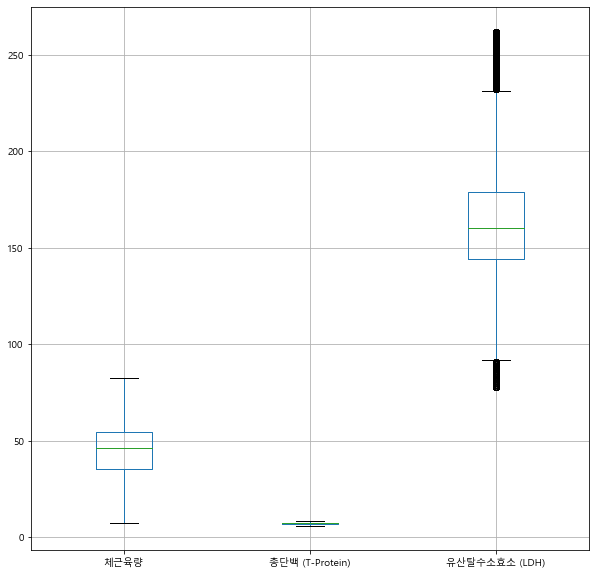

In [89]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [90]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,NaN,7.6,165.0
1,2010,7915,3997,1,36,NaN,7.3,241.0
2,2010,15783,1431,1,41,NaN,7.1,NaN
3,2010,15894,2533,2,29,NaN,7.1,NaN
4,2011,117186,8998,1,33,NaN,NaN,NaN


In [91]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [92]:
len(target_cols)

3

In [93]:
target_cols_direction

[False, 'center', 'center']

In [94]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [95]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

589.74383 sec


## 검진 항목별 가중치

In [96]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean
341063,2010.0,605512.0,253.0,1.0,42.0,NaN,7.6,233.0,100.0,89.82,13.16,67.66
341055,2010.0,439297.0,328.0,1.0,42.0,NaN,6.7,172.0,100.0,66.49,135.99,100.83
929503,2010.0,552037.0,332.0,2.0,41.0,NaN,6.7,170.0,100.0,96.22,96.29,97.50
391858,2010.0,225549.0,345.0,1.0,44.0,NaN,7.3,175.0,100.0,145.55,128.52,124.69
75898,2010.0,171280.0,431.0,1.0,31.0,NaN,6.9,NaN,100.0,113.86,100.00,104.62


In [97]:
target_cols_kde

['체근육량_kde', '총단백 (T-Protein)_kde', '유산탈수소효소 (LDH)_kde']

In [98]:
target_cols_ratio

[4, 2, 2]

In [99]:
sum(target_cols_ratio)

8

In [100]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084336 entries, 341063 to 1084335
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   검진년도                 1084298 non-null  float64
 1   UID                  1084298 non-null  float64
 2   CU_REC_ID            1084298 non-null  float64
 3   SEX                  1084298 non-null  float64
 4   검진당시나이               1084298 non-null  float64
 5   체근육량                 226803 non-null   float64
 6   총단백 (T-Protein)      981932 non-null   float64
 7   유산탈수소효소 (LDH)        779964 non-null   float64
 8   체근육량_kde             1084336 non-null  float64
 9   총단백 (T-Protein)_kde  1084336 non-null  float64
 10  유산탈수소효소 (LDH)_kde    1084336 non-null  float64
 11  kde_mean             1084336 non-null  float64
dtypes: float64(12)
memory usage: 107.5 MB


In [101]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])    
) / sum(target_cols_ratio)

In [102]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [103]:
df_target['kde_mean'].min()

8.17

In [104]:
df_target['kde_mean'].max()

174.24

In [105]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean
17,2019.0,153543.0,325845.0,1.0,20.0,NaN,6.28,157.6,100.00,4.59,146.85,87.86
35,2019.0,439691.0,326889.0,1.0,20.0,NaN,7.20,159.0,100.00,142.90,148.84,122.94
16,2019.0,153352.0,327360.0,1.0,20.0,NaN,7.00,222.0,100.00,111.71,18.73,82.61
12,2019.0,130234.0,328771.0,1.0,20.0,NaN,8.00,189.0,100.00,27.01,93.49,80.12
28,2019.0,339160.0,328877.0,1.0,20.0,NaN,7.00,171.0,100.00,111.71,132.81,111.13
7,2019.0,41096.0,329045.0,1.0,20.0,NaN,7.10,213.1,100.00,150.00,26.32,94.08
8,2019.0,117629.0,330495.0,1.0,20.0,NaN,7.70,232.0,100.00,74.92,13.82,72.18
23,2019.0,225921.0,334625.0,1.0,20.0,NaN,7.10,193.0,100.00,150.00,74.54,106.14
4,2019.0,34348.0,334912.0,1.0,20.0,NaN,7.20,161.0,100.00,142.90,150.00,123.22
24,2019.0,231541.0,341592.0,1.0,20.0,NaN,7.20,188.0,100.00,142.90,98.07,110.24


In [106]:
df_target['검진당시나이'].value_counts()

40.0    48238
38.0    47030
36.0    44825
42.0    44009
39.0    40759
41.0    40299
34.0    39962
37.0    39749
32.0    39673
30.0    38695
44.0    37566
35.0    37222
43.0    35296
46.0    34089
48.0    33159
31.0    32933
50.0    32703
33.0    32642
28.0    30941
45.0    30483
47.0    29354
49.0    29189
51.0    28819
29.0    28622
52.0    28517
53.0    23491
54.0    21402
27.0    21219
26.0    17965
55.0    15257
56.0    13563
57.0    11135
58.0     9992
25.0     9709
59.0     7860
24.0     6467
60.0     5705
23.0     3039
22.0     2344
62.0     1683
61.0     1640
63.0     1180
21.0     1176
64.0     1138
20.0     1023
65.0      773
66.0      686
67.0      433
68.0      418
69.0      226
Name: 검진당시나이, dtype: int64

In [107]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean
count,1.084298e+06,1.084298e+06,1.084298e+06,1.084298e+06,1.084298e+06,226803.000000,981932.00000,779964.000000,1.084336e+06,1.084336e+06,1.084336e+06,1.084336e+06
mean,2.021939e+03,5.157533e+05,1.523071e+06,1.372116e+00,4.059935e+01,44.669300,7.20250,163.952501,9.782504e+01,1.057504e+02,1.022050e+02,1.009014e+02
std,1.666780e+00,3.689309e+05,7.869237e+05,4.833694e-01,8.929217e+00,12.130059,0.41238,28.393742,2.097136e+01,3.879366e+01,3.729433e+01,1.716862e+01
min,2.010000e+03,4.800000e+01,2.530000e+02,1.000000e+00,2.000000e+01,7.600000,6.02000,78.000000,0.000000e+00,4.900000e-01,0.000000e+00,8.170000e+00
25%,2.021000e+03,2.228232e+05,7.069062e+05,1.000000e+00,3.400000e+01,35.400000,6.90000,144.000000,1.000000e+02,8.391000e+01,9.198000e+01,9.157000e+01
50%,2.022000e+03,3.842740e+05,1.502956e+06,1.000000e+00,4.000000e+01,46.200000,7.20000,160.000000,1.000000e+02,1.120900e+02,1.000000e+02,1.009000e+02
75%,2.023000e+03,8.446638e+05,2.194083e+06,2.000000e+00,4.700000e+01,54.300000,7.50000,179.000000,1.000000e+02,1.400500e+02,1.344800e+02,1.122100e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,82.300000,8.39000,262.000000,2.000000e+02,1.513100e+02,1.500600e+02,1.742400e+02


<AxesSubplot:>

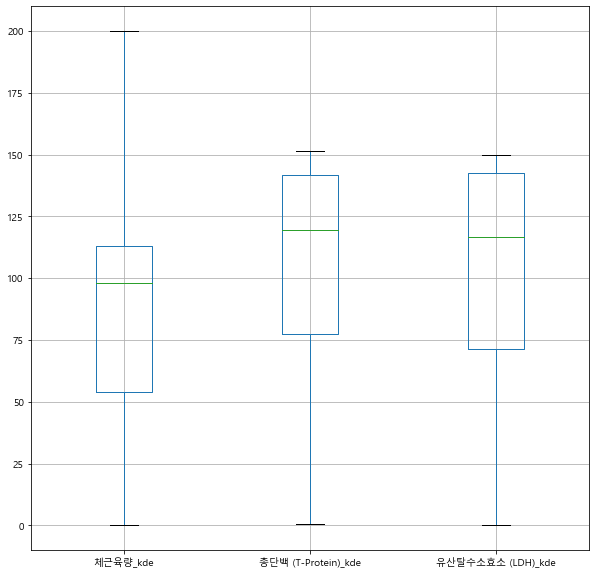

In [108]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['체근육량_kde', '총단백 (T-Protein)_kde', '유산탈수소효소 (LDH)_kde'])

<AxesSubplot:>

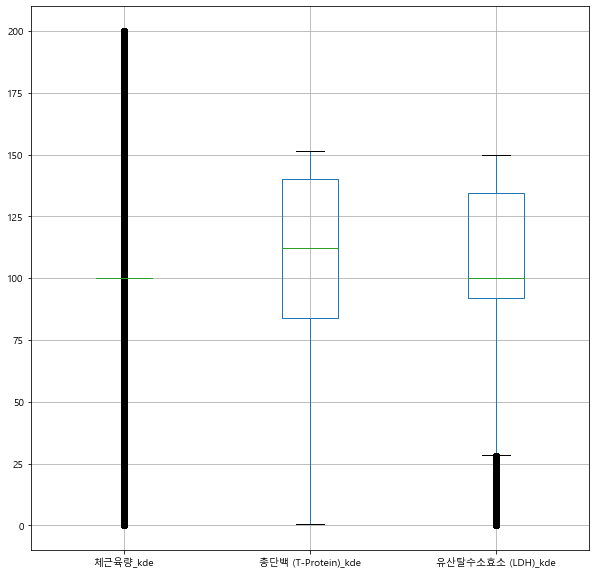

In [166]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['체근육량_kde', '총단백 (T-Protein)_kde', '유산탈수소효소 (LDH)_kde'])

## target Scaling

In [109]:
df_target['kde_mean'].max()

174.24

In [110]:
df_target['kde_mean'].min()

8.17

In [111]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [112]:
df_target['target'] = (df_target['target'] * 100) + 50

In [113]:
df_target['target'] = df_target['target'].round(0)

In [114]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
83,54.0,1
82,55.0,5
81,56.0,12
78,57.0,31
79,58.0,30
76,59.0,67
74,60.0,108
73,61.0,112
71,62.0,201
70,63.0,208


In [115]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,1.084298e+06,1.084298e+06,1.084298e+06,1.084298e+06,1.084298e+06,226803.000000,981932.00000,779964.000000,1.084336e+06,1.084336e+06,1.084336e+06,1.084336e+06,1.084336e+06
mean,2.021939e+03,5.157533e+05,1.523071e+06,1.372116e+00,4.059935e+01,44.669300,7.20250,163.952501,9.782504e+01,1.057504e+02,1.022050e+02,1.009014e+02,1.004470e+02
std,1.666780e+00,3.689309e+05,7.869237e+05,4.833694e-01,8.929217e+00,12.130059,0.41238,28.393742,2.097136e+01,3.879366e+01,3.729433e+01,1.716862e+01,8.584304e+00
min,2.010000e+03,4.800000e+01,2.530000e+02,1.000000e+00,2.000000e+01,7.600000,6.02000,78.000000,0.000000e+00,4.900000e-01,0.000000e+00,8.170000e+00,5.400000e+01
25%,2.021000e+03,2.228232e+05,7.069062e+05,1.000000e+00,3.400000e+01,35.400000,6.90000,144.000000,1.000000e+02,8.391000e+01,9.198000e+01,9.157000e+01,9.600000e+01
50%,2.022000e+03,3.842740e+05,1.502956e+06,1.000000e+00,4.000000e+01,46.200000,7.20000,160.000000,1.000000e+02,1.120900e+02,1.000000e+02,1.009000e+02,1.000000e+02
75%,2.023000e+03,8.446638e+05,2.194083e+06,2.000000e+00,4.700000e+01,54.300000,7.50000,179.000000,1.000000e+02,1.400500e+02,1.344800e+02,1.122100e+02,1.060000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,82.300000,8.39000,262.000000,2.000000e+02,1.513100e+02,1.500600e+02,1.742400e+02,1.370000e+02


<AxesSubplot:>

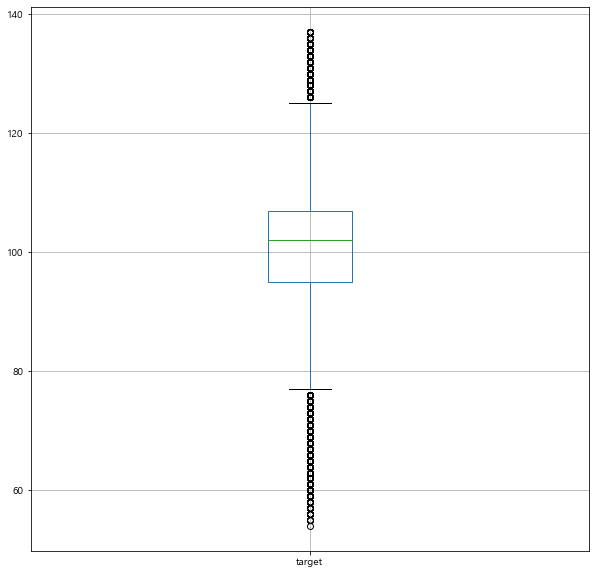

In [167]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

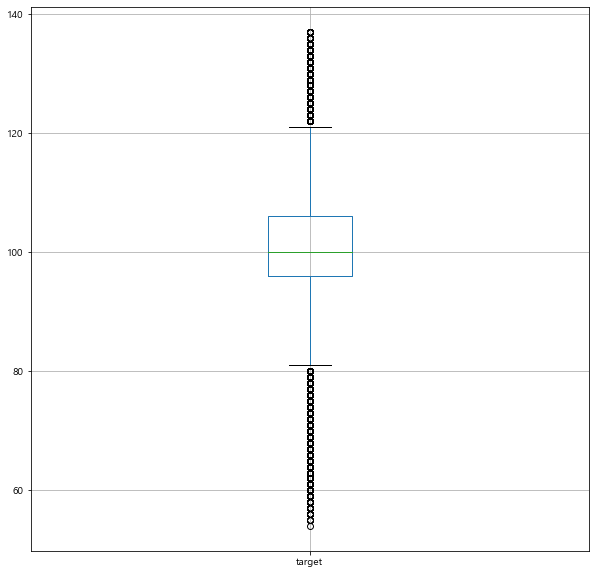

In [168]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

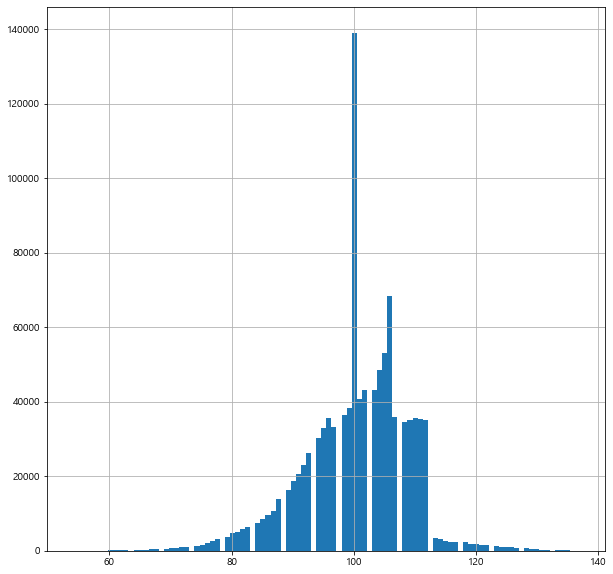

In [169]:
df_boxplot['target'].hist(bins=100)

In [116]:
df_target.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
341063,2010.0,605512.0,253.0,1.0,42.0,NaN,7.6,233.0,100.0,89.82,13.16,75.74,88.0
341055,2010.0,439297.0,328.0,1.0,42.0,NaN,6.7,172.0,100.0,66.49,135.99,100.62,100.0
929503,2010.0,552037.0,332.0,2.0,41.0,NaN,6.7,170.0,100.0,96.22,96.29,98.13,99.0
391858,2010.0,225549.0,345.0,1.0,44.0,NaN,7.3,175.0,100.0,145.55,128.52,118.52,109.0
75898,2010.0,171280.0,431.0,1.0,31.0,NaN,6.9,NaN,100.0,113.86,100.00,103.46,102.0
54634,2010.0,295306.0,436.0,1.0,30.0,NaN,6.7,NaN,100.0,64.10,100.00,91.02,96.0
38932,2010.0,209421.0,438.0,1.0,29.0,NaN,6.8,NaN,100.0,95.90,100.00,98.98,99.0
341034,2010.0,133016.0,452.0,1.0,42.0,NaN,6.8,NaN,100.0,90.64,100.00,97.66,99.0
13549,2010.0,334076.0,463.0,1.0,27.0,NaN,7.4,NaN,100.0,123.14,100.00,105.78,103.0
117614,2010.0,494015.0,484.0,1.0,33.0,NaN,7.3,NaN,100.0,145.17,100.00,111.29,106.0


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

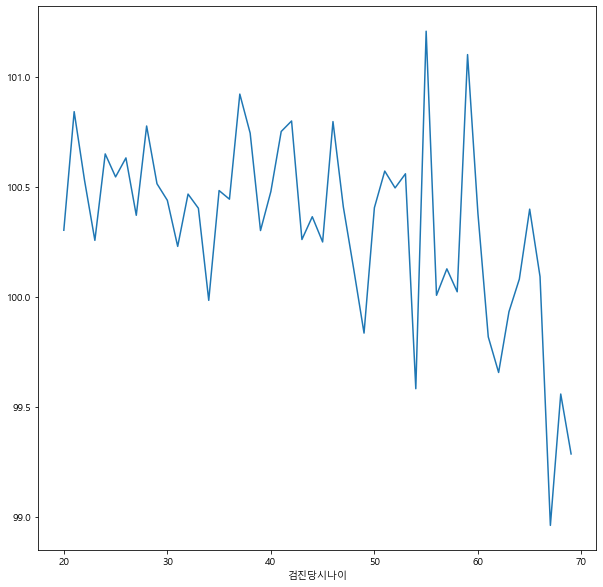

In [117]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

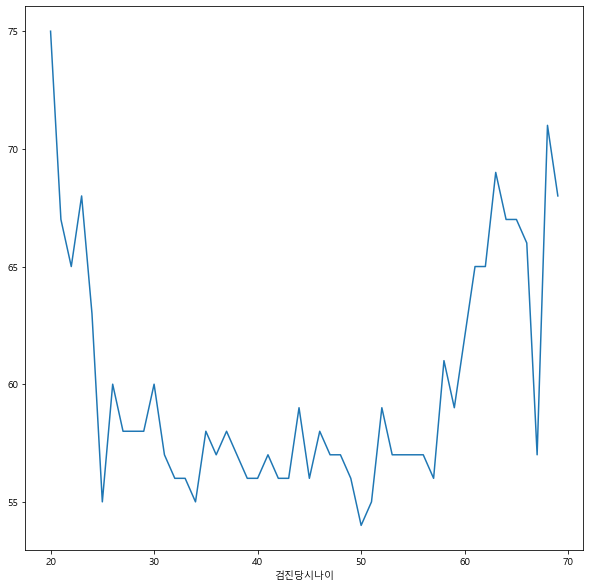

In [118]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

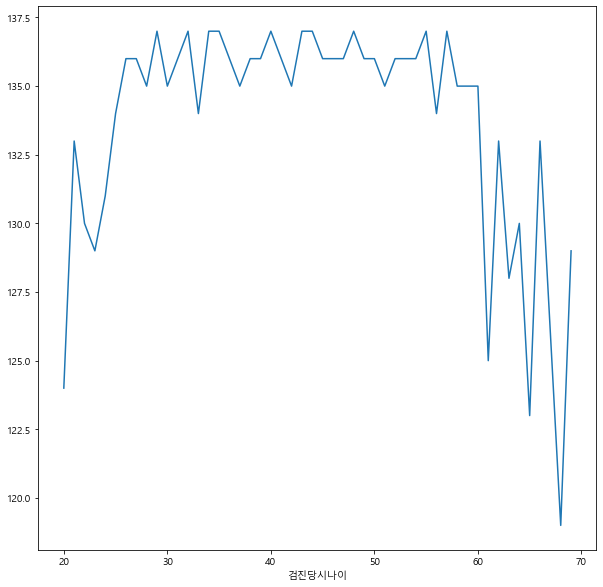

In [119]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [120]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
341063,2010.0,605512.0,253.0,1.0,42.0,NaN,7.6,233.0,100.0,89.82,13.16,75.74,88.0
341055,2010.0,439297.0,328.0,1.0,42.0,NaN,6.7,172.0,100.0,66.49,135.99,100.62,100.0
929503,2010.0,552037.0,332.0,2.0,41.0,NaN,6.7,170.0,100.0,96.22,96.29,98.13,99.0
391858,2010.0,225549.0,345.0,1.0,44.0,NaN,7.3,175.0,100.0,145.55,128.52,118.52,109.0
75898,2010.0,171280.0,431.0,1.0,31.0,NaN,6.9,NaN,100.0,113.86,100.00,103.46,102.0


# 결측행 제거

In [121]:
# df_result.dropna(axis=0).info()

In [122]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [123]:
df_target['SEX'].value_counts()

1.0    680813
2.0    403485
Name: SEX, dtype: int64

In [124]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

680813

In [125]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
341063,2010.0,605512.0,253.0,1.0,42.0,NaN,7.6,233.0,100.0,89.82,13.16,75.74,88.0
341055,2010.0,439297.0,328.0,1.0,42.0,NaN,6.7,172.0,100.0,66.49,135.99,100.62,100.0
391858,2010.0,225549.0,345.0,1.0,44.0,NaN,7.3,175.0,100.0,145.55,128.52,118.52,109.0
75898,2010.0,171280.0,431.0,1.0,31.0,NaN,6.9,NaN,100.0,113.86,100.00,103.46,102.0
54634,2010.0,295306.0,436.0,1.0,30.0,NaN,6.7,NaN,100.0,64.10,100.00,91.02,96.0


# 결측치 처리

## 결측치 삭제

In [126]:
# df_man.dropna(inplace=True)

In [127]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
341063,2010.0,605512.0,253.0,1.0,42.0,NaN,7.6,233.0,100.0,89.82,13.16,75.74,88.0
341055,2010.0,439297.0,328.0,1.0,42.0,NaN,6.7,172.0,100.0,66.49,135.99,100.62,100.0
391858,2010.0,225549.0,345.0,1.0,44.0,NaN,7.3,175.0,100.0,145.55,128.52,118.52,109.0
75898,2010.0,171280.0,431.0,1.0,31.0,NaN,6.9,NaN,100.0,113.86,100.00,103.46,102.0
54634,2010.0,295306.0,436.0,1.0,30.0,NaN,6.7,NaN,100.0,64.10,100.00,91.02,96.0


## 결측치 평균으로 대체

In [128]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [129]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [130]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [131]:
len(df_man)

680813

In [132]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [133]:
len(df_man)

620452

In [134]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
341063,2010.0,605512.0,253.0,1.0,42.0,NaN,7.6,233.0,100.0,89.82,13.16,75.74,88.0
341055,2010.0,439297.0,328.0,1.0,42.0,NaN,6.7,172.0,100.0,66.49,135.99,100.62,100.0
391858,2010.0,225549.0,345.0,1.0,44.0,NaN,7.3,175.0,100.0,145.55,128.52,118.52,109.0
75898,2010.0,171280.0,431.0,1.0,31.0,NaN,6.9,NaN,100.0,113.86,100.00,103.46,102.0
54634,2010.0,295306.0,436.0,1.0,30.0,NaN,6.7,NaN,100.0,64.10,100.00,91.02,96.0


## fillna

In [135]:
df_man.mean().round(2)

검진년도                      2022.07
UID                     515585.88
CU_REC_ID              1507734.29
SEX                          1.00
검진당시나이                      42.14
체근육량                        50.43
총단백 (T-Protein)              7.23
유산탈수소효소 (LDH)              167.11
체근육량_kde                    97.59
총단백 (T-Protein)_kde        106.04
유산탈수소효소 (LDH)_kde          102.63
kde_mean                   100.96
target                     100.47
dtype: float64

In [136]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [137]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [138]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [139]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [140]:
len(df_man)

620452

In [141]:
len(df_man)

620452

In [142]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [143]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
286101,2019.0,62.0,421626.0,1.0,40.0,50.43,7.60,156.00,100.00,104.99,149.14,113.53,107.0
317377,2020.0,62.0,565527.0,1.0,41.0,50.43,7.40,164.00,100.00,140.55,146.31,121.72,111.0
346135,2021.0,62.0,699357.0,1.0,42.0,50.43,7.00,152.00,100.00,136.57,147.04,120.90,110.0
375443,2022.0,62.0,1356310.0,1.0,43.0,50.43,7.20,151.00,100.00,148.23,137.68,121.48,111.0
404813,2023.0,62.0,2170394.0,1.0,44.0,50.43,7.50,149.00,100.00,125.89,131.06,114.24,107.0
610581,2022.0,67.0,1249745.0,1.0,54.0,50.43,6.60,185.00,100.00,54.99,83.15,84.54,92.0
572993,2022.0,76.0,1377275.0,1.0,52.0,50.43,6.80,167.11,100.00,97.93,100.00,99.48,100.0
572992,2022.0,76.0,1359161.0,1.0,52.0,50.43,6.80,167.11,100.00,97.93,100.00,99.48,100.0
16001,2021.0,77.0,621118.0,1.0,27.0,59.90,7.30,140.00,128.21,133.48,115.15,126.26,113.0
29344,2022.0,77.0,1047599.0,1.0,28.0,62.10,7.00,170.00,152.40,128.68,146.21,144.92,122.0


In [144]:
len(df_man)

620452

In [145]:
df_man[target_cols]

,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
286101,50.43,7.6,156.0
317377,50.43,7.4,164.0
346135,50.43,7.0,152.0
375443,50.43,7.2,151.0
404813,50.43,7.5,149.0
...,...,...,...
679328,50.43,6.8,179.0
679327,50.43,6.8,179.0
49151,50.43,7.4,176.0
11191,50.43,8.0,166.0


## first만 남겨두고 중복 제거

In [146]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [147]:
len(df_man)

518875

In [148]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
286101,2019.0,62.0,421626.0,1.0,40.0,50.43,7.60,156.00,100.00,104.99,149.14,113.53,107.0
317377,2020.0,62.0,565527.0,1.0,41.0,50.43,7.40,164.00,100.00,140.55,146.31,121.72,111.0
346135,2021.0,62.0,699357.0,1.0,42.0,50.43,7.00,152.00,100.00,136.57,147.04,120.90,110.0
375443,2022.0,62.0,1356310.0,1.0,43.0,50.43,7.20,151.00,100.00,148.23,137.68,121.48,111.0
404813,2023.0,62.0,2170394.0,1.0,44.0,50.43,7.50,149.00,100.00,125.89,131.06,114.24,107.0
610581,2022.0,67.0,1249745.0,1.0,54.0,50.43,6.60,185.00,100.00,54.99,83.15,84.54,92.0
572993,2022.0,76.0,1377275.0,1.0,52.0,50.43,6.80,167.11,100.00,97.93,100.00,99.48,100.0
16001,2021.0,77.0,621118.0,1.0,27.0,59.90,7.30,140.00,128.21,133.48,115.15,126.26,113.0
29344,2022.0,77.0,1047599.0,1.0,28.0,62.10,7.00,170.00,152.40,128.68,146.21,144.92,122.0
47800,2023.0,77.0,1739126.0,1.0,29.0,62.10,7.30,142.00,150.33,141.32,129.27,142.81,121.0


In [149]:
df_man.reset_index(drop=True, inplace=True)

In [150]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2019.0,62.0,421626.0,1.0,40.0,50.43,7.6,156.0,100.0,104.99,149.14,113.53,107.0
1,2020.0,62.0,565527.0,1.0,41.0,50.43,7.4,164.0,100.0,140.55,146.31,121.72,111.0
2,2021.0,62.0,699357.0,1.0,42.0,50.43,7.0,152.0,100.0,136.57,147.04,120.90,110.0
3,2022.0,62.0,1356310.0,1.0,43.0,50.43,7.2,151.0,100.0,148.23,137.68,121.48,111.0
4,2023.0,62.0,2170394.0,1.0,44.0,50.43,7.5,149.0,100.0,125.89,131.06,114.24,107.0


In [151]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518875 entries, 0 to 518874
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   검진년도                 518875 non-null  float64
 1   UID                  518875 non-null  float64
 2   CU_REC_ID            518875 non-null  float64
 3   SEX                  518875 non-null  float64
 4   검진당시나이               518875 non-null  float64
 5   체근육량                 518875 non-null  float64
 6   총단백 (T-Protein)      518875 non-null  float64
 7   유산탈수소효소 (LDH)        518875 non-null  float64
 8   체근육량_kde             518875 non-null  float64
 9   총단백 (T-Protein)_kde  518875 non-null  float64
 10  유산탈수소효소 (LDH)_kde    518875 non-null  float64
 11  kde_mean             518875 non-null  float64
 12  target               518875 non-null  float64
dtypes: float64(13)
memory usage: 51.5 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

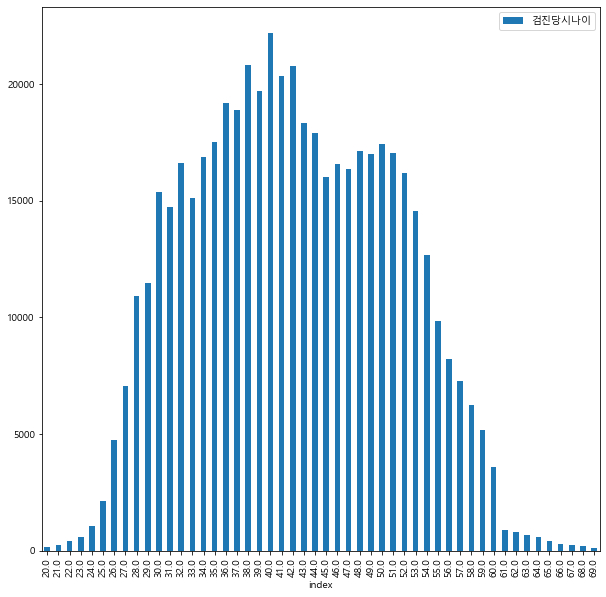

In [152]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [153]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20.0,174
45,21.0,248
43,22.0,430
41,23.0,571
36,24.0,1067
35,25.0,2133
33,26.0,4746
30,27.0,7084
26,28.0,10937
25,29.0,11478


# 검진항목 시각화

In [154]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,518875.000000,5.188750e+05,5.188750e+05,518875.0,518875.000000,518875.000000,518875.000000,518875.000000,518875.000000,518875.000000,518875.000000,518875.000000,518875.000000
mean,2022.024545,5.116454e+05,1.506419e+06,1.0,42.083592,50.368302,7.228727,167.264635,97.529497,105.810991,102.412199,100.820581,100.403502
std,1.576840,3.644468e+05,8.136516e+05,0.0,8.807854,4.817070,0.407782,24.963182,21.517429,40.964768,39.079529,17.892046,8.943984
min,2010.000000,6.200000e+01,2.530000e+02,1.0,20.000000,7.600000,6.030000,78.000000,0.000000,0.490000,0.000000,9.250000,55.000000
25%,2021.000000,2.228600e+05,6.597920e+05,1.0,35.000000,50.430000,6.900000,152.000000,100.000000,76.870000,85.170000,89.930000,95.000000
50%,2022.000000,3.828450e+05,1.437015e+06,1.0,42.000000,50.430000,7.200000,167.110000,100.000000,119.020000,100.000000,103.150000,102.000000
75%,2023.000000,8.392730e+05,2.243613e+06,1.0,49.000000,50.430000,7.500000,177.000000,100.000000,141.320000,137.460000,112.590000,106.000000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,82.300000,8.390000,262.000000,200.000000,151.310000,150.010000,174.240000,137.000000


<AxesSubplot:xlabel='검진당시나이'>

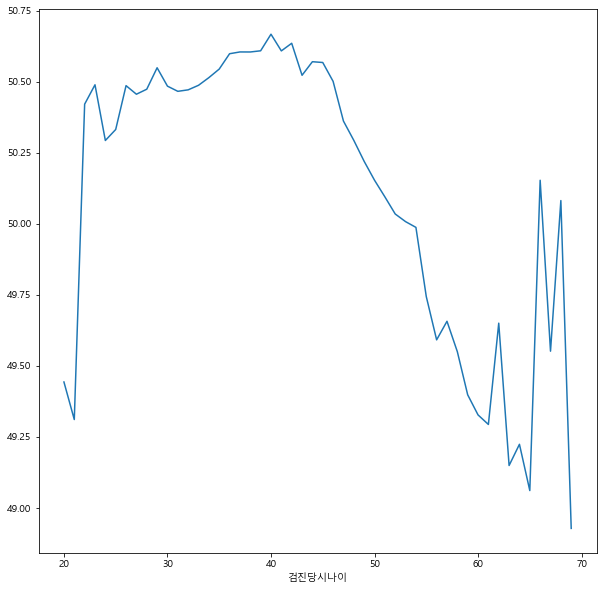

In [155]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

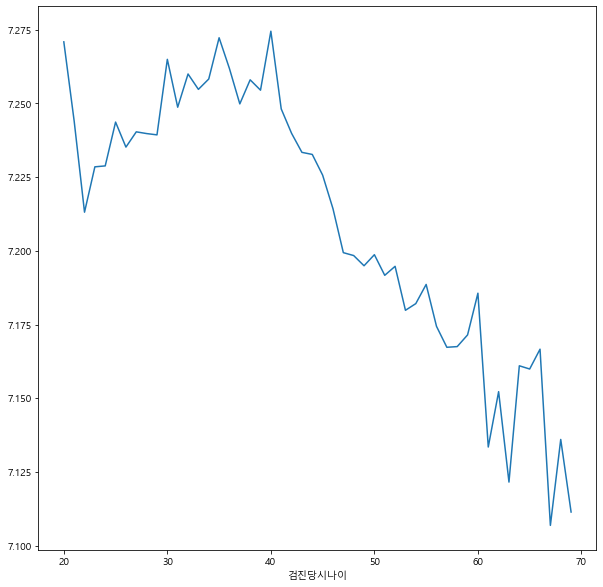

In [156]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

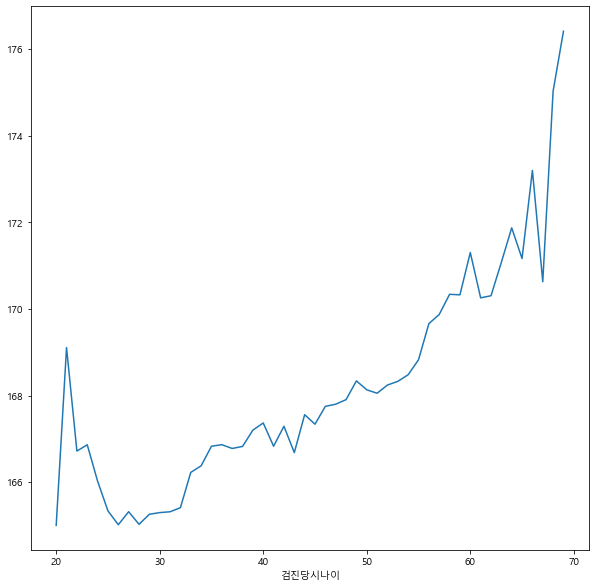

In [157]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

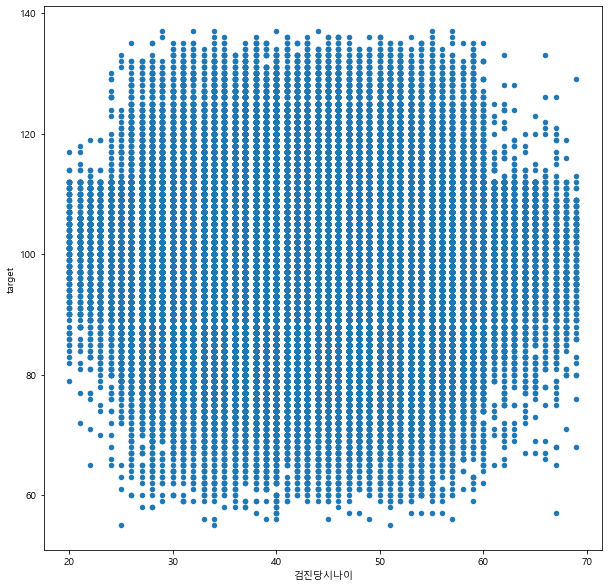

In [158]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

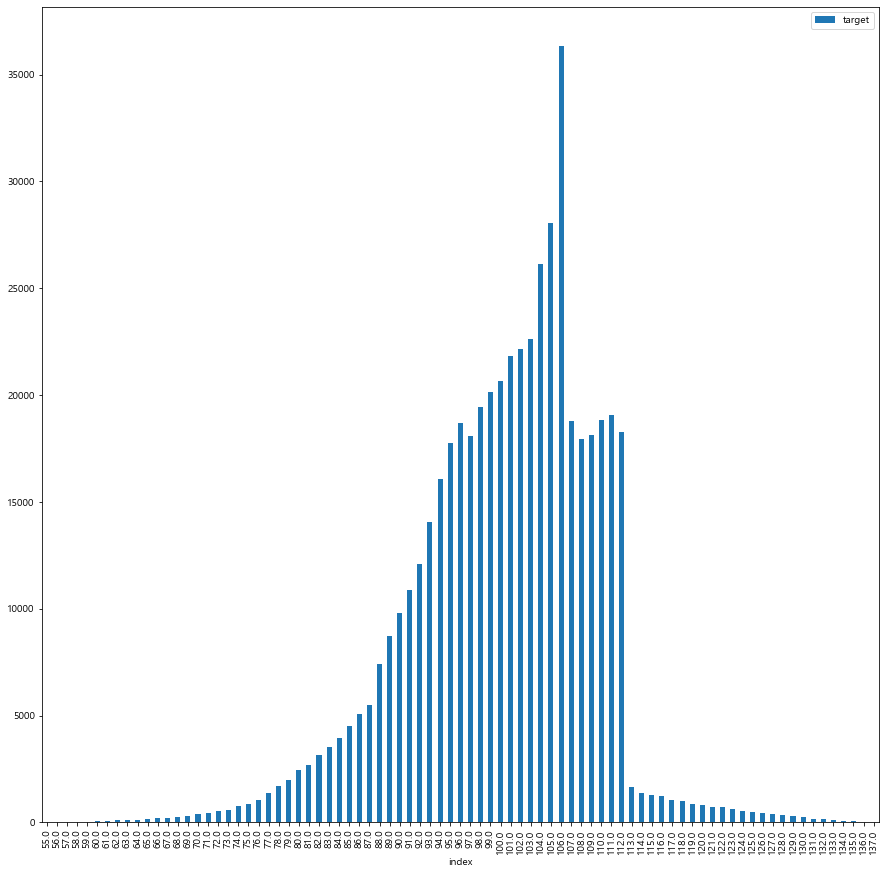

In [159]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [160]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
82,55.0,3
80,56.0,7
79,57.0,11
78,58.0,12
76,59.0,36
73,60.0,63
72,61.0,66
70,62.0,110
71,63.0,109
68,64.0,121


In [161]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [162]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

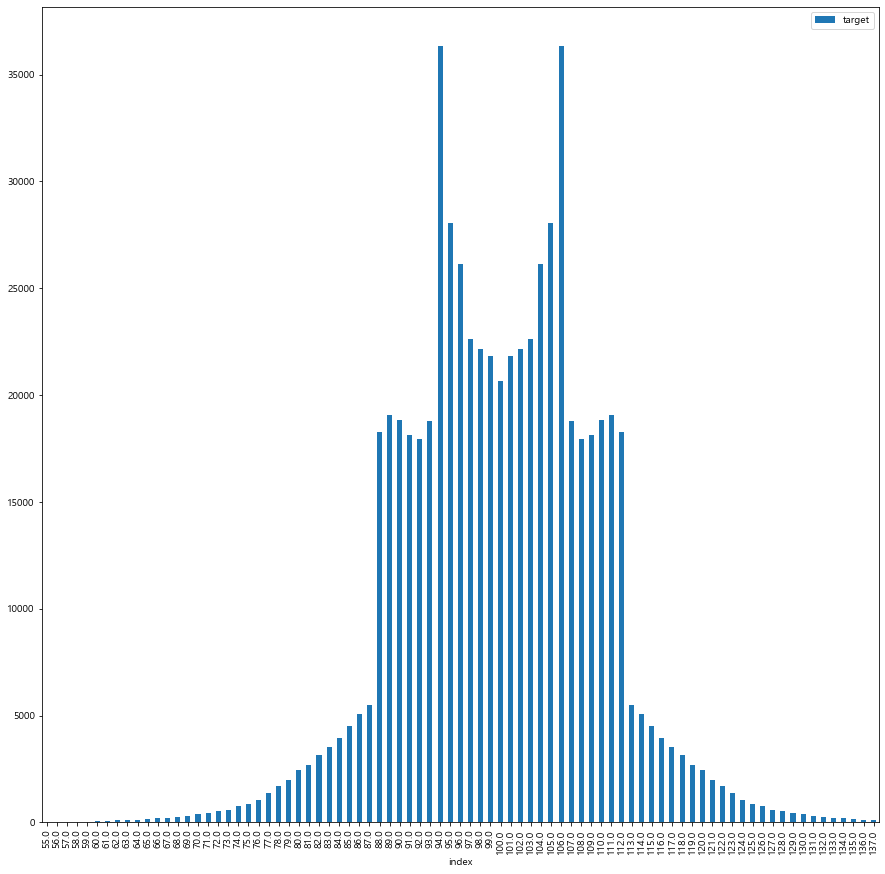

In [163]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [164]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
82,55.0,3
81,56.0,7
80,57.0,11
79,58.0,12
78,59.0,36
77,60.0,63
76,61.0,66
73,62.0,110
75,63.0,109
72,64.0,121


# 나이별 확인하기

In [170]:
# target = 'target'

In [171]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [172]:
# df_man = df_man_sample

In [173]:
# int(df_man['검진당시나이'].value_counts().mean())

In [174]:
# df_man['검진당시나이'].min()

In [175]:
# df_man['검진당시나이'].max()

In [176]:
# df_man.columns

In [177]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [178]:
# df_temp.info()

In [179]:
# df_temp.reset_index(drop=True, inplace=True)

In [180]:
# df_man = df_temp.copy()

In [181]:
# df_man['검진당시나이'].value_counts()

In [182]:
# df_man[df_man['검진당시나이']==38]

In [183]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [184]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체근육량', '총단백 (T-Protein)',
       '유산탈수소효소 (LDH)', '체근육량_kde', '총단백 (T-Protein)_kde', '유산탈수소효소 (LDH)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [185]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [186]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [187]:
train_columns = target_cols.copy()

In [188]:
train_columns.insert(0, '검진당시나이')

In [189]:
train_columns

['검진당시나이', '체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [190]:
target_col = 'target'

## Min Max Scaling

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
scaling_bool

False

In [193]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [194]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [195]:
# model = LinearRegression()

In [196]:
# model.fit(X_train, y_train)

In [197]:
# model.intercept_

In [198]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [199]:
model = XGBRegressor()

In [200]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [201]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [202]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 2820.46 seconds for 10 candidates parameter settings.


In [203]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [204]:
# best score
random_search.best_score_

-0.16003446203641253

In [205]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [206]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [207]:
# model = build_model()

In [208]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [209]:
# model.summary()

In [210]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [211]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [212]:
# plot_history(history)

## pyTorch 신경망

In [213]:
np.shape(X_train)[1]

4

In [214]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [215]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [216]:
# epochs = 1000

In [217]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [218]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [219]:
# plt.plot(losses)

## coef 계산

In [220]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [221]:
# df_coef.columns = ['검사항목', 'coef']

In [222]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [223]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [224]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [225]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [226]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [227]:
# slr = LinearRegression()

In [228]:
# slr.fit(X_train_poly, y_train)

In [229]:
# np.shape(X_train)

In [230]:
# np.shape(X_train_poly)

In [231]:
# np.shape(X_test)

In [232]:
# np.shape(X_test_poly)

In [233]:
# y_pred_poly = slr.predict(X_test_poly)

In [234]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [235]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [236]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [237]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [238]:
pyTorch_bool

False

In [239]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [240]:
XGB_bool

True

In [241]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [242]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.291016573717583
MSE : 0.1515733508688474
RMSE : 0.38932422332658345


In [243]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9982920504316597

In [244]:
model.score(X_test, y_test)

0.9982920504316597

## feature importance

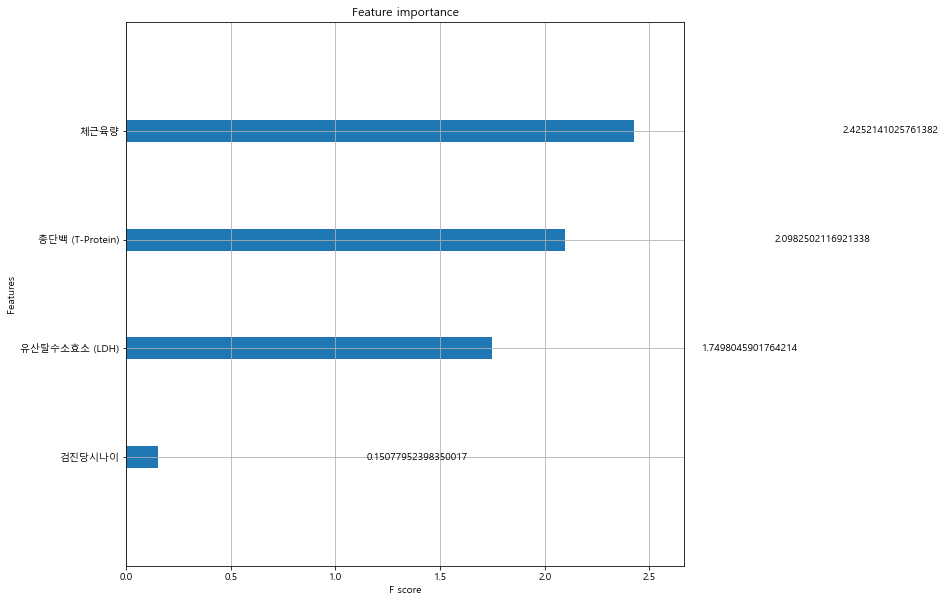

In [245]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [246]:
model.feature_importances_

array([0.02347111, 0.37752113, 0.32662427, 0.27238348], dtype=float32)

In [247]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [248]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,체근육량,0.377521
2,총단백 (T-Protein),0.326624
3,유산탈수소효소 (LDH),0.272383
0,검진당시나이,0.023471


# 실제지수 - 예측지수 결과

In [249]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,112.0
1,105.0
2,97.0
3,92.0
4,96.0
...,...
160264,95.0
160265,110.0
160266,100.0
160267,101.0


In [250]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,112.287674
1,104.565002
2,96.894676
3,92.251053
4,96.030495
...,...
160264,94.081985
160265,109.572571
160266,100.057579
160267,101.317917


In [251]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [252]:
df_test.head()

,target,0
0,112.0,112.287674
1,105.0,104.565002
2,97.0,96.894676
3,92.0,92.251053
4,96.0,96.030495


In [253]:
df_test.columns

Index(['target', 0], dtype='object')

In [254]:
df_test.columns = ['실제지수', '예측지수']

In [255]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [256]:
df_test.head()

,실제지수,예측지수,diff
0,112.0,112.287674,0.287674
1,105.0,104.565002,-0.434998
2,97.0,96.894676,-0.105324
3,92.0,92.251053,0.251053
4,96.0,96.030495,0.030495


In [257]:
df_test['diff_int'] = df_test['diff'].round(0)

In [258]:
len(df_test)

160269

In [259]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,112.0,112.287674,0.287674,0.0
1,105.0,104.565002,-0.434998,-0.0
2,97.0,96.894676,-0.105324,-0.0
3,92.0,92.251053,0.251053,0.0
4,96.0,96.030495,0.030495,0.0


<AxesSubplot:>

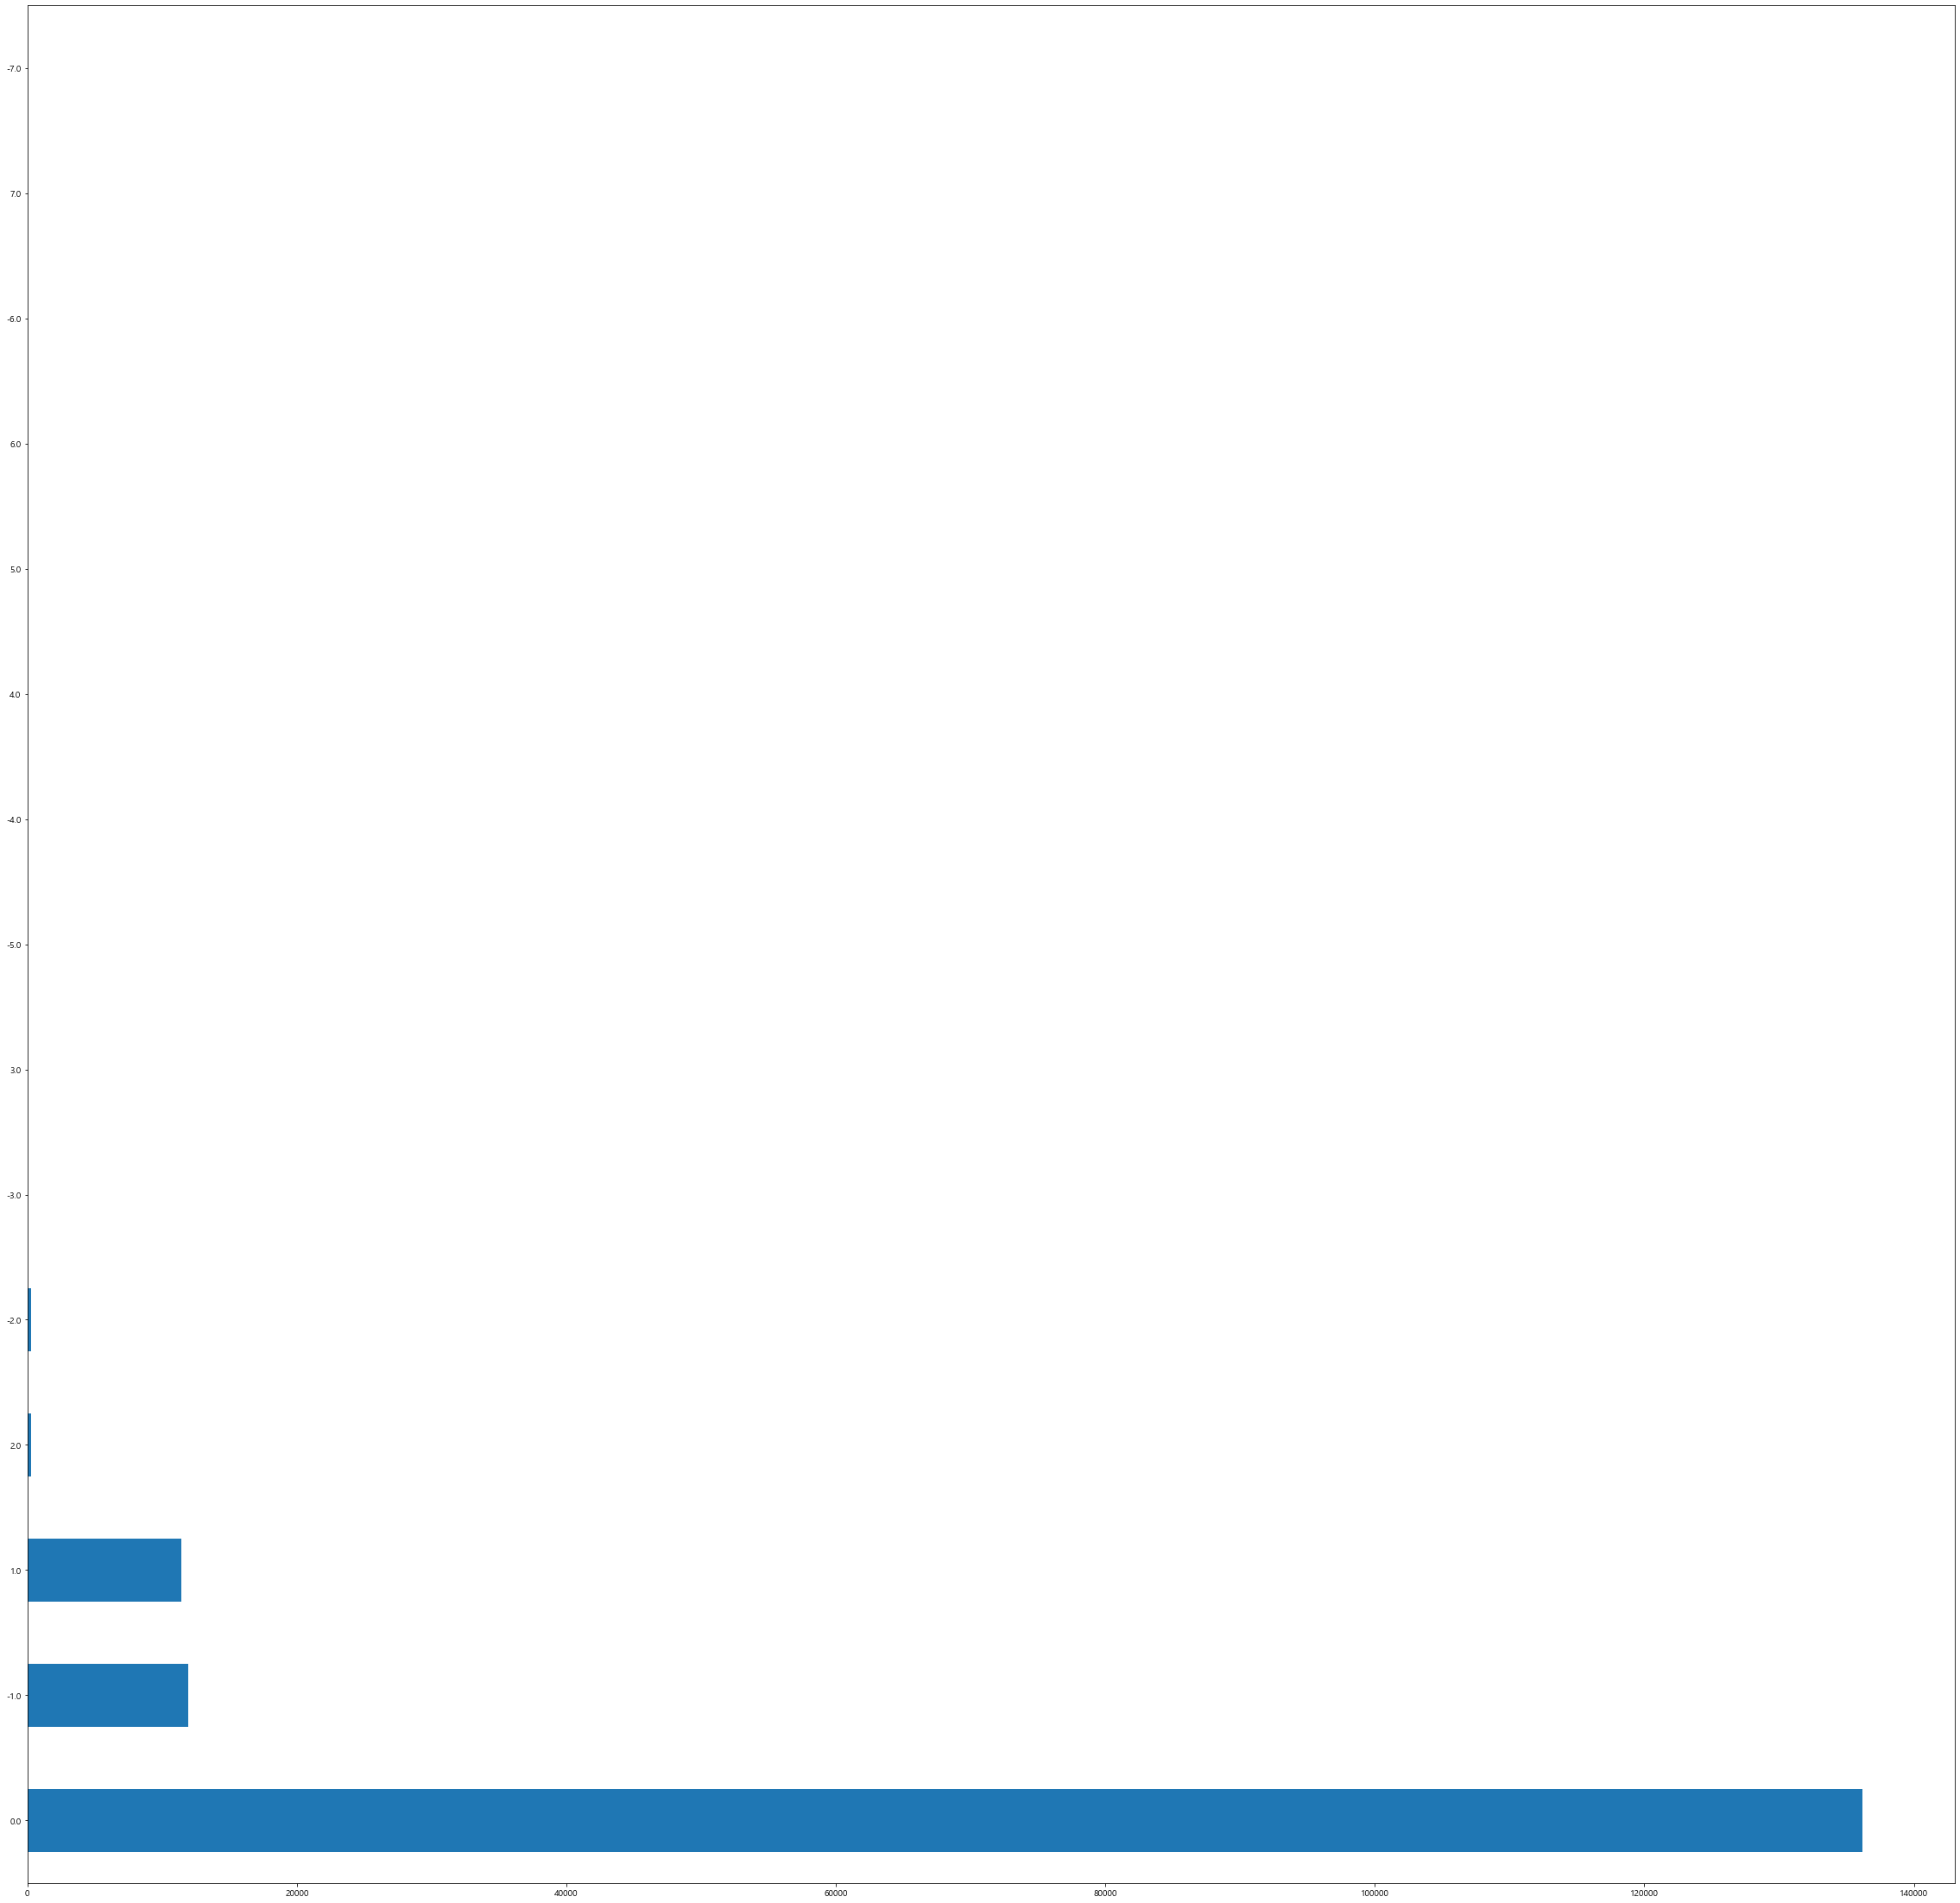

In [260]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [261]:
df_test['diff_int'].value_counts(ascending=False)

 0.0    136210
-1.0     11953
 1.0     11451
 2.0       285
-2.0       262
-3.0        36
 3.0        28
-5.0        15
-4.0        13
 4.0         5
 5.0         3
 6.0         3
-6.0         3
 7.0         1
-7.0         1
Name: diff_int, dtype: int64

In [262]:
df_test['예측지수'].round(0).value_counts()

106.0    8995
94.0     8809
105.0    7192
95.0     7132
104.0    6503
96.0     6480
102.0    5700
97.0     5607
103.0    5554
98.0     5552
101.0    5513
99.0     5393
100.0    5110
93.0     4902
111.0    4832
90.0     4805
89.0     4699
110.0    4694
107.0    4686
109.0    4586
91.0     4524
88.0     4501
108.0    4494
92.0     4461
112.0    4440
87.0     1537
86.0     1270
113.0    1249
114.0    1248
115.0    1197
85.0     1116
116.0     986
84.0      939
117.0     916
83.0      915
82.0      764
118.0     743
81.0      738
119.0     688
120.0     677
80.0      609
79.0      514
121.0     500
122.0     422
78.0      410
77.0      304
123.0     302
76.0      278
124.0     260
75.0      232
125.0     214
126.0     189
74.0      166
73.0      152
127.0     149
72.0      135
128.0     127
71.0      120
129.0     108
130.0      92
70.0       91
69.0       74
67.0       72
131.0      69
132.0      69
68.0       54
134.0      51
133.0      48
135.0      43
66.0       42
65.0       40
137.0 

# 예측 나이 분포

In [263]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [264]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [265]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [266]:
df_plot = pd.DataFrame(y_test.value_counts())

In [267]:
df_plot.columns = ['count']

In [268]:
df_plot.reset_index(inplace=True)

In [269]:
df_plot = df_plot.sort_values('index', ascending=True)

In [270]:
df_plot

,index,count
81,56.0,1
79,57.0,4
80,58.0,3
78,59.0,10
77,60.0,16
76,61.0,21
75,62.0,25
74,63.0,25
73,64.0,26
68,65.0,44


In [271]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

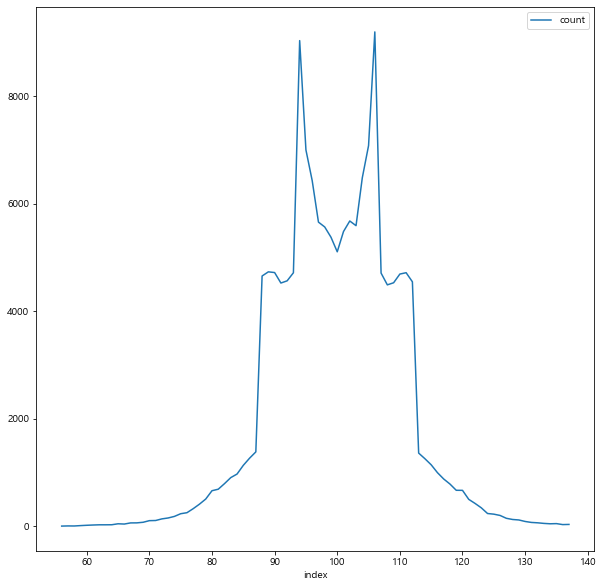

In [272]:
df_plot.plot()

In [273]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [274]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [275]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [276]:
df_plot.columns = ['count']

In [277]:
df_plot.reset_index(inplace=True)

In [278]:
df_plot = df_plot.sort_values(0, ascending=True)

In [279]:
df_plot.set_index(0, inplace=True)

In [280]:
df_plot

,count
0,
56.0,1
57.0,4
58.0,3
59.0,10
60.0,14
61.0,23
62.0,19
63.0,28
64.0,23


<AxesSubplot:xlabel='0'>

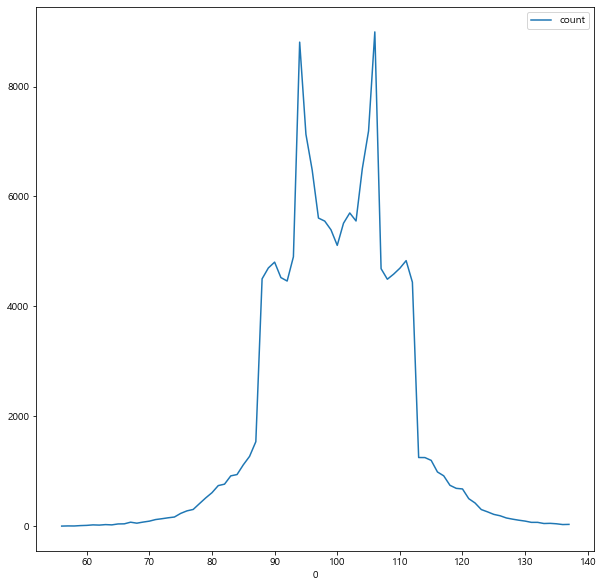

In [281]:
df_plot.plot()

# 시각화

In [282]:
# model.coef_

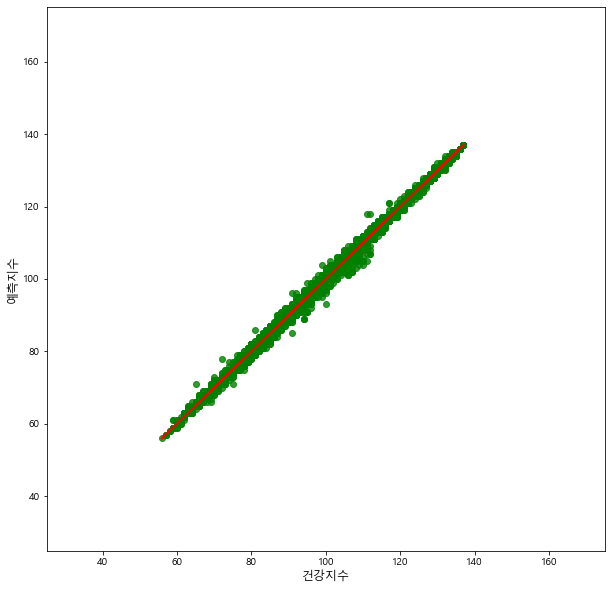

In [283]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [284]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2019.0,62.0,421626.0,1.0,40.0,50.43,7.6,156.0,100.0,104.99,149.14,113.53,107.0
1,2020.0,62.0,565527.0,1.0,41.0,50.43,7.4,164.0,100.0,140.55,146.31,121.72,111.0
2,2021.0,62.0,699357.0,1.0,42.0,50.43,7.0,152.0,100.0,136.57,147.04,120.90,110.0
3,2022.0,62.0,1356310.0,1.0,43.0,50.43,7.2,151.0,100.0,148.23,137.68,121.48,111.0
4,2023.0,62.0,2170394.0,1.0,44.0,50.43,7.5,149.0,100.0,125.89,131.06,114.24,107.0


In [285]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518875 entries, 0 to 518874
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   검진년도                 518875 non-null  float64
 1   UID                  518875 non-null  float64
 2   CU_REC_ID            518875 non-null  float64
 3   SEX                  518875 non-null  float64
 4   검진당시나이               518875 non-null  float64
 5   체근육량                 518875 non-null  float64
 6   총단백 (T-Protein)      518875 non-null  float64
 7   유산탈수소효소 (LDH)        518875 non-null  float64
 8   체근육량_kde             518875 non-null  float64
 9   총단백 (T-Protein)_kde  518875 non-null  float64
 10  유산탈수소효소 (LDH)_kde    518875 non-null  float64
 11  kde_mean             518875 non-null  float64
 12  target               518875 non-null  float64
dtypes: float64(13)
memory usage: 51.5 MB


In [286]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
79818,2022.0,168996.0,2259500.0,1.0,35.0,50.43,7.5,179.0,100.0,119.02,105.92,106.24,103.0
79819,2023.0,168996.0,2259499.0,1.0,36.0,50.43,7.5,173.0,100.0,112.19,130.46,110.66,105.0
79820,2024.0,168996.0,2281994.0,1.0,37.0,50.43,7.5,195.0,100.0,117.83,62.15,94.99,97.0


In [287]:
train_columns

['검진당시나이', '체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [288]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [289]:
len(df_pred)

518875

In [290]:
df_pred.reset_index(drop=True, inplace=True)

In [291]:
X_test

,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
89262,56.0,50.43,7.1,167.00
448828,35.0,53.00,7.6,164.00
256587,30.0,58.00,7.0,210.00
259005,38.0,50.43,6.6,167.11
199273,29.0,50.43,7.4,204.00
...,...,...,...,...
28399,38.0,50.43,6.8,195.00
415738,45.0,50.43,7.0,153.00
106031,49.0,50.43,7.3,196.00
372639,37.0,50.43,7.2,128.00


In [292]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체근육량', '총단백 (T-Protein)',
       '유산탈수소효소 (LDH)', '체근육량_kde', '총단백 (T-Protein)_kde', '유산탈수소효소 (LDH)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [293]:
df_pred[train_columns]

,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
0,40.0,50.43,7.6,156.0
1,41.0,50.43,7.4,164.0
2,42.0,50.43,7.0,152.0
3,43.0,50.43,7.2,151.0
4,44.0,50.43,7.5,149.0
...,...,...,...,...
518870,36.0,50.43,7.7,136.0
518871,65.0,50.43,6.8,179.0
518872,29.0,50.43,7.4,176.0
518873,26.0,50.43,8.0,166.0


In [294]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [295]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [296]:
pred_data = pred_data.round(0)

In [297]:
pred_data

array([107., 111., 111., ..., 106.,  95.,  93.], dtype=float32)

In [298]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [299]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [300]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수
0,2019.0,62.0,421626.0,1.0,40.0,50.43,7.60,156.00,100.00,104.99,149.14,113.53,107.0,107.0
1,2020.0,62.0,565527.0,1.0,41.0,50.43,7.40,164.00,100.00,140.55,146.31,121.72,111.0,111.0
2,2021.0,62.0,699357.0,1.0,42.0,50.43,7.00,152.00,100.00,136.57,147.04,120.90,110.0,111.0
3,2022.0,62.0,1356310.0,1.0,43.0,50.43,7.20,151.00,100.00,148.23,137.68,121.48,111.0,111.0
4,2023.0,62.0,2170394.0,1.0,44.0,50.43,7.50,149.00,100.00,125.89,131.06,114.24,107.0,107.0
5,2022.0,67.0,1249745.0,1.0,54.0,50.43,6.60,185.00,100.00,54.99,83.15,84.54,92.0,92.0
6,2022.0,76.0,1377275.0,1.0,52.0,50.43,6.80,167.11,100.00,97.93,100.00,99.48,100.0,100.0
7,2021.0,77.0,621118.0,1.0,27.0,59.90,7.30,140.00,128.21,133.48,115.15,126.26,113.0,113.0
8,2022.0,77.0,1047599.0,1.0,28.0,62.10,7.00,170.00,152.40,128.68,146.21,144.92,122.0,122.0
9,2023.0,77.0,1739126.0,1.0,29.0,62.10,7.30,142.00,150.33,141.32,129.27,142.81,121.0,121.0


## 예측지수 성능평가

In [301]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.15350517947482534

# target으로 나이 계산

In [302]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [303]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2019.0,62.0,421626.0,1.0,40.0,50.43,7.60,156.00,100.00,104.99,149.14,113.53,107.0,107.0,38.6
1,2020.0,62.0,565527.0,1.0,41.0,50.43,7.40,164.00,100.00,140.55,146.31,121.72,111.0,111.0,38.8
2,2021.0,62.0,699357.0,1.0,42.0,50.43,7.00,152.00,100.00,136.57,147.04,120.90,110.0,111.0,39.8
3,2022.0,62.0,1356310.0,1.0,43.0,50.43,7.20,151.00,100.00,148.23,137.68,121.48,111.0,111.0,40.8
4,2023.0,62.0,2170394.0,1.0,44.0,50.43,7.50,149.00,100.00,125.89,131.06,114.24,107.0,107.0,42.6
5,2022.0,67.0,1249745.0,1.0,54.0,50.43,6.60,185.00,100.00,54.99,83.15,84.54,92.0,92.0,55.6
6,2022.0,76.0,1377275.0,1.0,52.0,50.43,6.80,167.11,100.00,97.93,100.00,99.48,100.0,100.0,52.0
7,2021.0,77.0,621118.0,1.0,27.0,59.90,7.30,140.00,128.21,133.48,115.15,126.26,113.0,113.0,24.4
8,2022.0,77.0,1047599.0,1.0,28.0,62.10,7.00,170.00,152.40,128.68,146.21,144.92,122.0,122.0,23.6
9,2023.0,77.0,1739126.0,1.0,29.0,62.10,7.30,142.00,150.33,141.32,129.27,142.81,121.0,121.0,24.8


## 예측나이 성능평가

In [304]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.4116721753794261

# 최종 산출

In [305]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2019.0,62.0,421626.0,1.0,40.0,50.43,7.6,156.0,100.0,104.99,149.14,113.53,107.0,107.0,38.6
1,2020.0,62.0,565527.0,1.0,41.0,50.43,7.4,164.0,100.0,140.55,146.31,121.72,111.0,111.0,38.8
2,2021.0,62.0,699357.0,1.0,42.0,50.43,7.0,152.0,100.0,136.57,147.04,120.90,110.0,111.0,39.8
3,2022.0,62.0,1356310.0,1.0,43.0,50.43,7.2,151.0,100.0,148.23,137.68,121.48,111.0,111.0,40.8
4,2023.0,62.0,2170394.0,1.0,44.0,50.43,7.5,149.0,100.0,125.89,131.06,114.24,107.0,107.0,42.6


# DataMart csv

In [306]:
df_copy = df.copy()

In [307]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,NaN,7.6,165.0
1,2010,7490,3638,1,39,NaN,6.9,298.0
2,2010,7915,3997,1,36,NaN,7.3,241.0
3,2010,8056,4745,1,42,NaN,7.2,315.0
4,2010,8457,3929,1,38,NaN,7.6,350.0


In [308]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   체근육량             248954 non-null   float64
 6   총단백 (T-Protein)  1111245 non-null  float64
 7   유산탈수소효소 (LDH)    907336 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [309]:
minimums

[7.550000000000008, 6.000000000000001, 78.0]

In [310]:
maximums

[82.35, 8.399999999999999, 262.0]

In [311]:
train_columns

['검진당시나이', '체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [312]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [313]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [314]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [315]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,NaN,7.6,165.0
1,2010,7490,3638,1,39,NaN,6.9,262.0
2,2010,7915,3997,1,36,NaN,7.3,241.0
3,2010,8056,4745,1,42,NaN,7.2,262.0
4,2010,8457,3929,1,38,NaN,7.6,262.0


## 검진 항목 all 결측치 지우기

In [316]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [317]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [318]:
df_man_csv.reset_index(drop=True, inplace=True)

In [319]:
len(df_man_csv)

705098

## fillna

In [320]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 총단백 (T-Protein) 스크리닝

In [321]:
screening = 8.5

In [322]:
scr_col = '총단백 (T-Protein)'

In [323]:
df_man_csv[df_man_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)


In [324]:
len(df_man_csv[df_man_csv[scr_col] > screening])

0

In [325]:
df_man_csv.loc[df_man_csv[scr_col] > screening, scr_col] = screening

In [326]:
df_man_csv[df_man_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)


In [327]:
len(df_man_csv[df_man_csv[scr_col] > screening])

0

## 모델 예측

In [328]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [329]:
pred_data = pred_data.round(0)

In [330]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [331]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수
0,2010,7282,2520,1,42,50.37,7.6,165.0,100.0
1,2010,7490,3638,1,39,50.37,6.9,262.0,83.0
2,2010,7915,3997,1,36,50.37,7.3,241.0,90.0
3,2010,8056,4745,1,42,50.37,7.2,262.0,89.0
4,2010,8457,3929,1,38,50.37,7.6,262.0,84.0


### 성능 평가

In [332]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [333]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [334]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [335]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 1.6692536356648302


In [336]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9426681474865183

In [337]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
0,2010,7282,2520,1,42,50.37,7.6,165.0,100.0,42.0
1,2010,7490,3638,1,39,50.37,6.9,262.0,83.0,42.4
2,2010,7915,3997,1,36,50.37,7.3,241.0,90.0,38.0
3,2010,8056,4745,1,42,50.37,7.2,262.0,89.0,44.2
4,2010,8457,3929,1,38,50.37,7.6,262.0,84.0,41.2


In [338]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705098 entries, 0 to 705097
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             705098 non-null  int64  
 1   UID              705098 non-null  int64  
 2   CU_REC_ID        705098 non-null  int64  
 3   SEX              705098 non-null  int64  
 4   검진당시나이           705098 non-null  int64  
 5   체근육량             705098 non-null  float64
 6   총단백 (T-Protein)  705098 non-null  float64
 7   유산탈수소효소 (LDH)    705098 non-null  float64
 8   예측지수             705098 non-null  float32
 9   예측나이             705098 non-null  float64
dtypes: float32(1), float64(4), int64(5)
memory usage: 51.1 MB


# 최종 UID별 확인

In [339]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
252878,2022,175673,751348,1,48,50.37,6.8,140.0,96.0,48.8
252879,2022,175673,1463838,1,48,50.37,6.8,140.0,96.0,48.8
252815,2022,175673,1919125,1,48,50.37,6.8,140.0,96.0,48.8
252880,2022,175673,2169120,1,48,50.37,6.8,140.0,96.0,48.8
252816,2022,175673,2223795,1,48,50.37,6.8,140.0,96.0,48.8
252817,2022,175673,2237465,1,48,50.37,6.8,140.0,96.0,48.8
252881,2022,175673,2238320,1,48,50.37,6.8,140.0,96.0,48.8
252882,2022,175673,2246042,1,48,50.37,6.8,140.0,96.0,48.8
413075,2023,175673,1463893,1,49,50.37,6.9,138.0,98.0,49.4
413071,2023,175673,1919126,1,49,50.37,6.9,138.0,98.0,49.4


In [340]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
179699,2021,289587,796178,1,47,50.37,7.5,137.0,96.0,47.8
283961,2022,289587,866076,1,48,50.37,7.4,139.0,98.0,48.4
283916,2022,289587,2115999,1,48,50.37,7.4,139.0,98.0,48.4
88226,2022,289587,2603574,1,48,50.37,7.4,139.0,98.0,48.4
461903,2023,289587,1487447,1,49,50.37,7.4,163.0,106.0,47.8
461904,2023,289587,2227964,1,49,50.37,7.4,163.0,106.0,47.8
641588,2024,289587,2243723,1,50,50.37,7.2,152.0,108.0,48.4
641566,2024,289587,2603575,1,50,50.37,7.2,152.0,108.0,48.4


In [341]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
383337,2022,897603,1066133,1,51,50.37,7.2,176.0,107.0,49.6
383348,2022,897603,1068885,1,51,50.37,7.2,176.0,107.0,49.6
383349,2022,897603,1728532,1,51,50.37,7.2,176.0,107.0,49.6
383350,2022,897603,2555144,1,51,50.37,7.2,176.0,107.0,49.6
552808,2023,897603,1458387,1,52,50.37,7.2,158.0,110.0,50.0
552809,2023,897603,1728531,1,52,50.37,7.2,158.0,110.0,50.0
541501,2023,897603,2120063,1,52,50.37,7.2,158.0,110.0,50.0
541502,2023,897603,2351665,1,52,50.37,7.2,158.0,110.0,50.0
552810,2023,897603,2555143,1,52,50.37,7.2,158.0,110.0,50.0
541503,2023,897603,2622260,1,52,50.37,7.2,158.0,110.0,50.0


In [342]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
237421,2022,119172,751336,1,41,50.37,7.3,168.0,108.0,39.4
237422,2022,119172,1432355,1,41,50.37,7.3,168.0,108.0,39.4
237419,2022,119172,1432476,1,41,50.37,7.3,168.0,108.0,39.4
237423,2022,119172,2247083,1,41,50.37,7.3,168.0,108.0,39.4
237424,2022,119172,2252956,1,41,50.37,7.3,168.0,108.0,39.4
399053,2023,119172,1436742,1,42,50.37,7.4,172.0,104.0,41.2
399054,2023,119172,2247082,1,42,50.37,7.4,172.0,104.0,41.2
399055,2023,119172,2252955,1,42,50.37,7.4,172.0,104.0,41.2
623244,2024,119172,2250063,1,43,50.37,7.1,172.0,103.0,42.4
623245,2024,119172,2252954,1,43,50.37,7.1,172.0,103.0,42.4


In [343]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
552803,2023,897595,1525045,1,40,50.37,6.5,185.0,86.0,42.8
552804,2023,897595,1593851,1,40,50.37,6.5,185.0,86.0,42.8
552801,2023,897595,2005289,1,40,50.37,6.5,185.0,86.0,42.8
552802,2023,897595,2138998,1,40,50.37,6.5,185.0,86.0,42.8
537130,2023,897595,2320478,1,40,50.37,6.5,185.0,86.0,42.8
552805,2023,897595,2328772,1,40,50.37,6.5,185.0,86.0,42.8
683364,2024,897595,2329051,1,41,50.37,6.6,181.0,87.0,43.6


In [344]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
332278,2022,492764,909688,1,39,50.37,7.4,160.0,103.0,38.4
332279,2022,492764,1575802,1,39,50.37,7.4,160.0,103.0,38.4
332282,2022,492764,1668547,1,39,50.37,7.4,160.0,103.0,38.4
332280,2022,492764,2246777,1,39,50.37,7.4,160.0,103.0,38.4
332281,2022,492764,2330256,1,39,50.37,7.4,160.0,103.0,38.4
133146,2022,492764,2343199,1,39,50.37,7.4,160.0,103.0,38.4
150332,2022,492764,2363393,1,39,50.37,7.4,160.0,103.0,38.4
150333,2022,492764,2639564,1,39,50.37,7.4,160.0,103.0,38.4
150334,2022,492764,2703924,1,39,50.37,7.4,160.0,103.0,38.4
332283,2022,492764,2783328,1,39,50.37,7.4,160.0,103.0,38.4


In [345]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
556946,2023,933936,1431742,1,40,50.37,7.6,170.0,102.0,39.6
556947,2023,933936,1435266,1,40,50.37,7.6,170.0,102.0,39.6
684656,2024,933936,2242997,1,41,50.37,6.8,155.0,101.0,40.8


In [346]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
250431,2022,168996,919754,1,35,50.37,7.5,179.0,99.0,35.2
250432,2022,168996,1425925,1,35,50.37,7.5,179.0,99.0,35.2
250433,2022,168996,2259500,1,35,50.37,7.5,179.0,99.0,35.2
410832,2023,168996,1425970,1,36,50.37,7.5,173.0,102.0,35.6
410833,2023,168996,1475832,1,36,50.37,7.5,173.0,102.0,35.6
410834,2023,168996,2259499,1,36,50.37,7.5,173.0,102.0,35.6
628442,2024,168996,2281994,1,37,50.37,7.5,195.0,92.0,38.6


# 여성 모델

In [347]:
df_target['SEX'].value_counts()

1.0    680813
2.0    403485
Name: SEX, dtype: int64

In [348]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

403485

# 결측치 처리

## 결측치 삭제

In [349]:
# df_woman.dropna(inplace=True)

In [350]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
929503,2010.0,552037.0,332.0,2.0,41.0,NaN,6.7,170.0,100.0,96.22,96.29,98.13,99.0
720336,2010.0,710522.0,632.0,2.0,28.0,NaN,7.7,151.0,100.0,65.90,145.83,102.93,101.0
780175,2010.0,703063.0,1116.0,2.0,32.0,NaN,7.3,150.0,100.0,130.43,146.96,119.35,110.0
708995,2010.0,713853.0,1218.0,2.0,27.0,NaN,7.6,231.0,100.0,84.76,1.96,71.68,86.0
911304,2010.0,479951.0,1246.0,2.0,40.0,NaN,7.3,176.0,100.0,133.16,78.24,102.85,101.0


## 결측치 평균으로 대체

In [351]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [352]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [353]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [354]:
len(df_woman)

403485

In [355]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [356]:
len(df_woman)

364178

In [357]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
929503,2010.0,552037.0,332.0,2.0,41.0,NaN,6.7,170.0,100.0,96.22,96.29,98.13,99.0
720336,2010.0,710522.0,632.0,2.0,28.0,NaN,7.7,151.0,100.0,65.90,145.83,102.93,101.0
780175,2010.0,703063.0,1116.0,2.0,32.0,NaN,7.3,150.0,100.0,130.43,146.96,119.35,110.0
708995,2010.0,713853.0,1218.0,2.0,27.0,NaN,7.6,231.0,100.0,84.76,1.96,71.68,86.0
911304,2010.0,479951.0,1246.0,2.0,40.0,NaN,7.3,176.0,100.0,133.16,78.24,102.85,101.0


In [358]:
len(df_woman)

364178

## fillna

In [359]:
df_woman.mean().round(2)

검진년도                      2022.02
UID                     496639.96
CU_REC_ID              1498306.38
SEX                          2.00
검진당시나이                      38.54
체근육량                        34.16
총단백 (T-Protein)              7.16
유산탈수소효소 (LDH)              158.59
체근육량_kde                    97.64
총단백 (T-Protein)_kde        106.84
유산탈수소효소 (LDH)_kde          102.09
kde_mean                   101.05
target                     100.52
dtype: float64

In [360]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [361]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [362]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [363]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [364]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
929503,2010.0,552037.0,332.0,2.0,41.0,34.16,6.7,170.0,100.0,96.22,96.29,98.13,99.0
720336,2010.0,710522.0,632.0,2.0,28.0,34.16,7.7,151.0,100.0,65.90,145.83,102.93,101.0
780175,2010.0,703063.0,1116.0,2.0,32.0,34.16,7.3,150.0,100.0,130.43,146.96,119.35,110.0
708995,2010.0,713853.0,1218.0,2.0,27.0,34.16,7.6,231.0,100.0,84.76,1.96,71.68,86.0
911304,2010.0,479951.0,1246.0,2.0,40.0,34.16,7.3,176.0,100.0,133.16,78.24,102.85,101.0


# 중복 제거

In [365]:
len(df_woman)

364178

In [366]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [367]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
700667,2021.0,53.0,2632765.0,2.0,26.0,34.16,7.2,174.00,100.00,149.48,59.32,102.20,101.0
700666,2021.0,53.0,664316.0,2.0,26.0,34.16,7.2,174.00,100.00,149.48,59.32,102.20,101.0
747205,2024.0,53.0,2658222.0,2.0,29.0,34.16,7.1,172.00,100.00,147.84,77.11,106.24,103.0
750877,2020.0,54.0,497669.0,2.0,30.0,35.30,7.0,130.00,93.46,144.69,102.44,108.51,104.0
786363,2022.0,54.0,1319859.0,2.0,32.0,34.16,6.8,137.00,100.00,103.33,133.42,109.19,105.0
804746,2023.0,54.0,2039511.0,2.0,33.0,34.16,6.4,135.00,100.00,37.10,129.02,91.53,96.0
825695,2024.0,54.0,2750990.0,2.0,34.0,36.00,7.1,156.00,100.32,144.28,135.67,120.15,110.0
801819,2022.0,56.0,1351361.0,2.0,33.0,34.16,6.5,158.59,100.00,52.29,100.00,88.07,94.0
801818,2022.0,56.0,1019732.0,2.0,33.0,34.16,6.5,158.59,100.00,52.29,100.00,88.07,94.0
820894,2023.0,56.0,2032999.0,2.0,34.0,34.16,7.1,158.59,100.00,144.28,100.00,111.07,106.0


## first만 남겨두고 중복 제거

In [368]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [369]:
df_woman.reset_index(drop=True, inplace=True)

In [370]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2021.0,53.0,2632765.0,2.0,26.0,34.16,7.2,174.00,100.00,149.48,59.32,102.20,101.0
1,2024.0,53.0,2658222.0,2.0,29.0,34.16,7.1,172.00,100.00,147.84,77.11,106.24,103.0
2,2020.0,54.0,497669.0,2.0,30.0,35.30,7.0,130.00,93.46,144.69,102.44,108.51,104.0
3,2022.0,54.0,1319859.0,2.0,32.0,34.16,6.8,137.00,100.00,103.33,133.42,109.19,105.0
4,2023.0,54.0,2039511.0,2.0,33.0,34.16,6.4,135.00,100.00,37.10,129.02,91.53,96.0
5,2024.0,54.0,2750990.0,2.0,34.0,36.00,7.1,156.00,100.32,144.28,135.67,120.15,110.0
6,2022.0,56.0,1351361.0,2.0,33.0,34.16,6.5,158.59,100.00,52.29,100.00,88.07,94.0
7,2023.0,56.0,2032999.0,2.0,34.0,34.16,7.1,158.59,100.00,144.28,100.00,111.07,106.0
8,2021.0,59.0,701026.0,2.0,29.0,34.16,7.1,158.59,100.00,147.84,100.00,111.96,106.0
9,2022.0,59.0,1376992.0,2.0,30.0,34.16,6.9,158.59,100.00,134.91,100.00,108.73,104.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

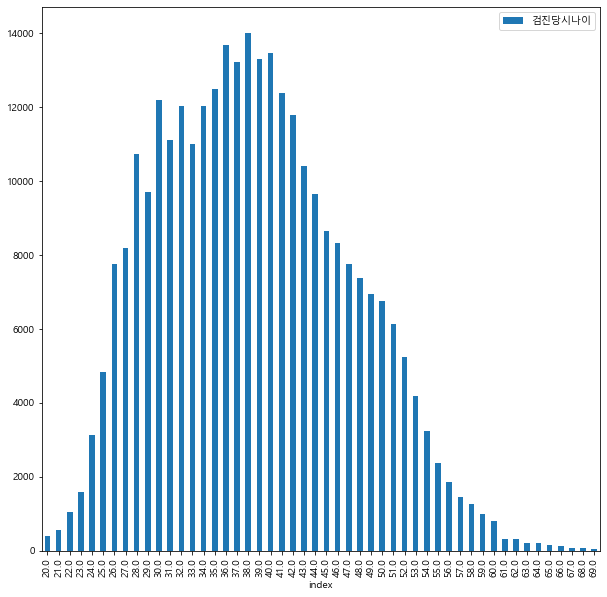

In [371]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [372]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20.0,393
39,21.0,568
36,22.0,1062
33,23.0,1598
30,24.0,3130
27,25.0,4824
20,26.0,7773
19,27.0,8184
13,28.0,10725
15,29.0,9708


# 검진항목 시각화

In [373]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,305746.000000,3.057460e+05,3.057460e+05,305746.0,305746.000000,305746.000000,305746.000000,305746.000000,305746.000000,305746.000000,305746.000000,305746.000000,305746.000000
mean,2021.971715,4.913354e+05,1.488045e+06,2.0,38.540524,34.110989,7.163642,158.824457,97.637622,106.622844,101.830131,100.932063,100.465167
std,1.543906,3.632992e+05,8.136761e+05,0.0,8.438012,3.453468,0.419211,25.610300,21.027778,40.451976,39.703462,17.777920,8.890886
min,2010.000000,5.300000e+01,3.320000e+02,2.0,20.000000,7.600000,6.020000,78.000000,0.000000,1.760000,0.000000,8.170000,54.000000
25%,2021.000000,2.153182e+05,6.484922e+05,2.0,32.000000,34.160000,6.900000,143.000000,100.000000,79.210000,84.280000,90.140000,95.000000
50%,2022.000000,3.690190e+05,1.390602e+06,2.0,38.000000,34.160000,7.160000,158.590000,100.000000,119.240000,100.000000,103.350000,102.000000
75%,2023.000000,8.218430e+05,2.189732e+06,2.0,44.000000,34.160000,7.400000,167.000000,100.000000,143.030000,137.070000,112.660000,106.000000
max,2024.000000,1.473590e+06,2.871326e+06,2.0,69.000000,68.000000,8.390000,262.000000,200.000000,150.890000,150.060000,174.040000,137.000000


<AxesSubplot:xlabel='검진당시나이'>

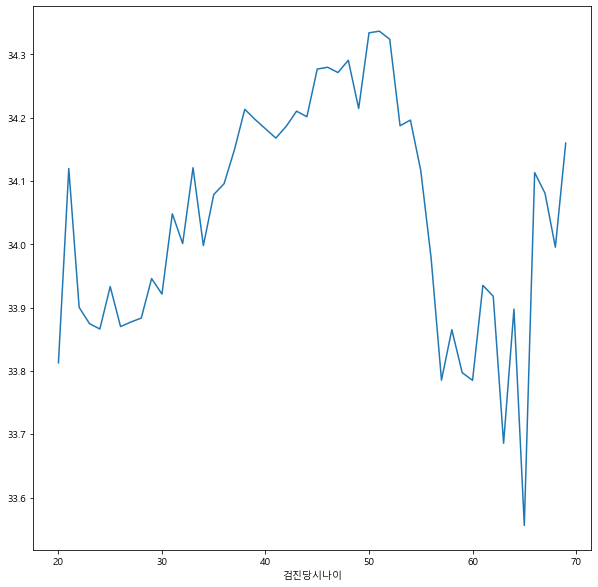

In [374]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

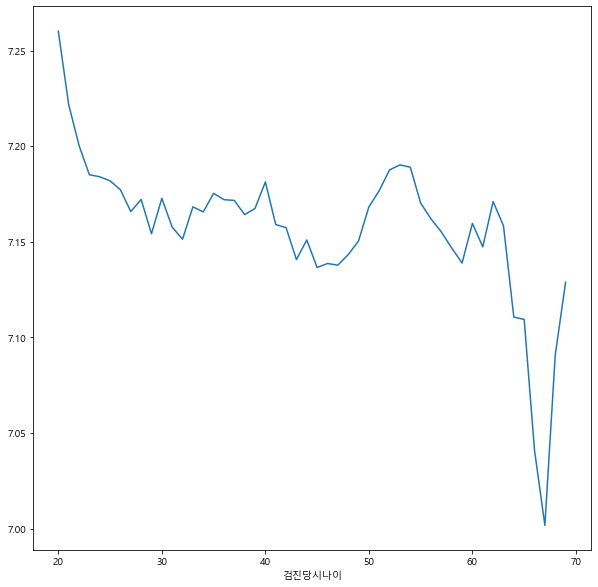

In [375]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

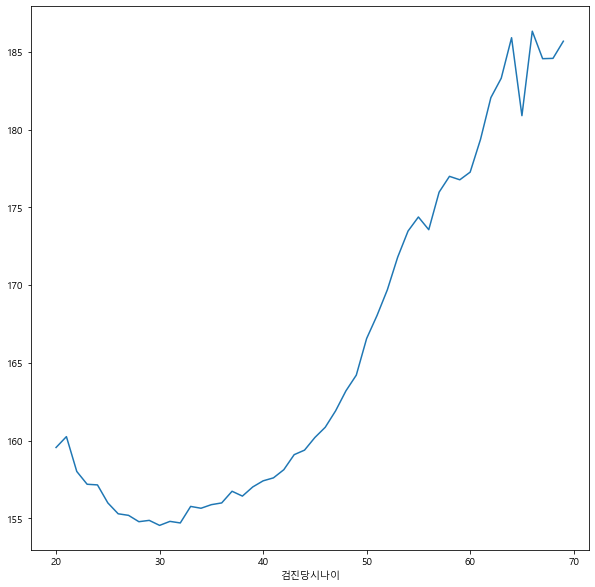

In [376]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

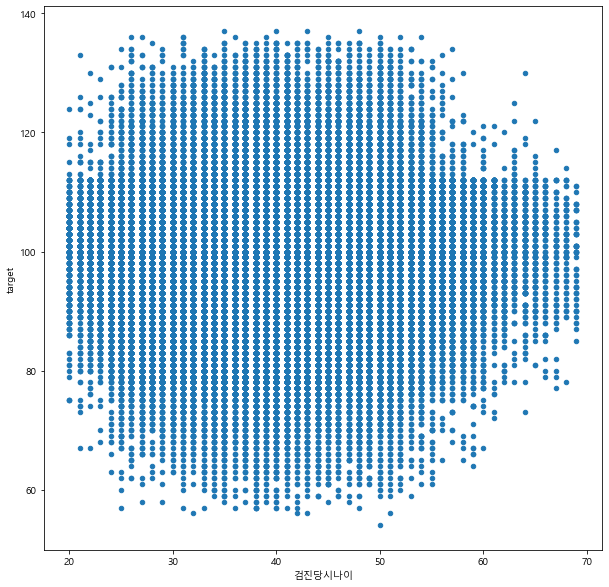

In [377]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

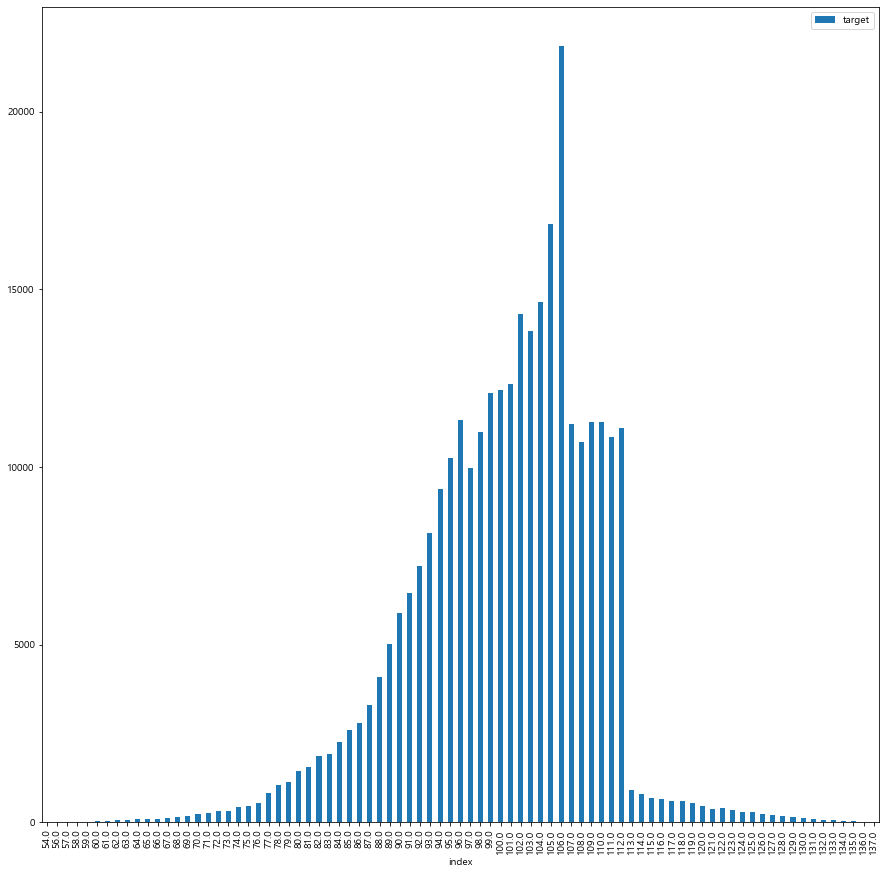

In [378]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [379]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
82,54.0,1
81,56.0,4
77,57.0,13
78,58.0,12
76,59.0,24
75,60.0,29
73,61.0,34
70,62.0,58
69,63.0,66
67,64.0,83


In [380]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [381]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

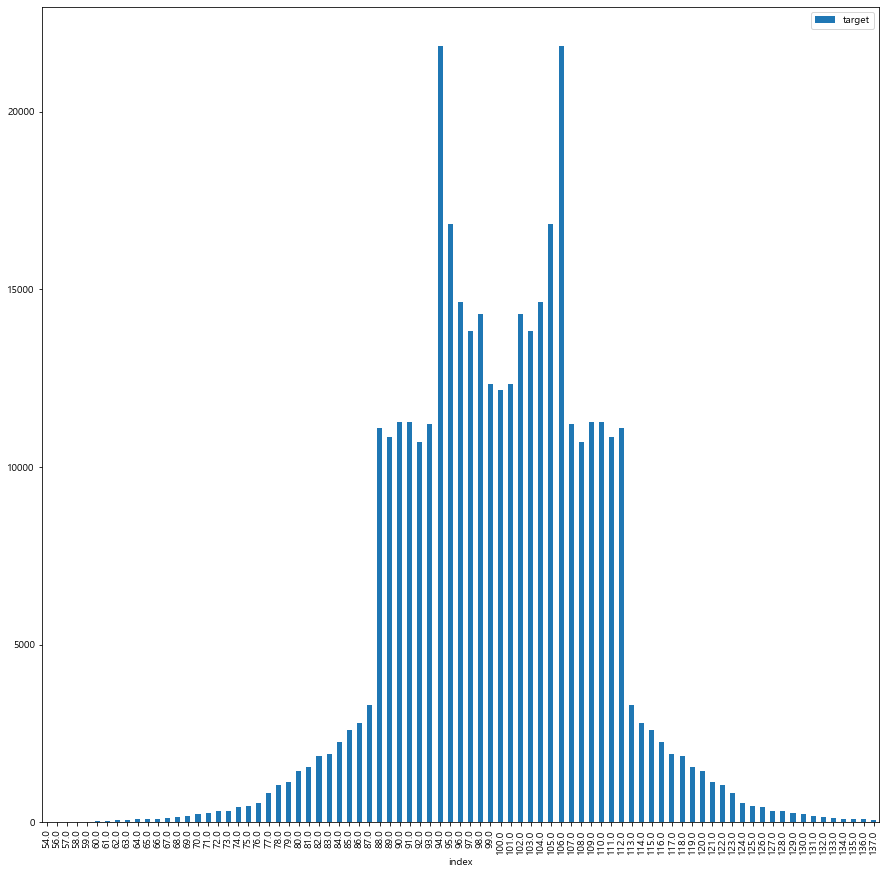

In [382]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [383]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
82,54.0,1
81,56.0,4
79,57.0,13
80,58.0,12
78,59.0,24
77,60.0,29
76,61.0,34
75,62.0,58
74,63.0,66
72,64.0,83


# 나이별 확인하기

In [384]:
# df_woman['검진당시나이'].value_counts()

In [385]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [386]:
# df_woman['검진당시나이'].min()

In [387]:
# df_woman['검진당시나이'].max()

In [388]:
# df_woman.columns

In [389]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [390]:
# df_temp.info()

In [391]:
# df_temp.reset_index(drop=True, inplace=True)

In [392]:
# df_woman = df_temp.copy()

In [393]:
# df_woman['검진당시나이'].value_counts()

In [394]:
# df_woman[df_woman['검진당시나이']==20]

In [395]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [396]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [397]:
train_columns

['검진당시나이', '체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [398]:
# target_col = '검진당시나이'

In [399]:
target_col

'target'

## Min Max Scaling

In [400]:
from sklearn.preprocessing import MinMaxScaler

In [401]:
scaling_bool

False

In [402]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [403]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [404]:
# model2 = LinearRegression()

In [405]:
# model2.fit(X_train2, y_train2)

In [406]:
# model2.intercept_

In [407]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [408]:
model2 = XGBRegressor()

In [409]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [410]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [411]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1422.40 seconds for 10 candidates parameter settings.


In [412]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [413]:
# best score
random_search.best_score_

-0.19260797286779302

In [414]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [415]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [416]:
# model = build_model()

In [417]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [418]:
# model.summary()

In [419]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [420]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [421]:
# plot_history(history)

## pyTorch 신경망

In [422]:
np.shape(X_train)[1]

4

In [423]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [424]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [425]:
# epochs = 1000

In [426]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [427]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [428]:
# plt.plot(losses)

## coef 계산

In [429]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [430]:
# df_coef2.columns = ['검사항목', 'coef']

In [431]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [432]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [433]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [434]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [435]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [436]:
# slr2 = LinearRegression()

In [437]:
# slr2.fit(X_train2_poly, y_train2)

In [438]:
# np.shape(X_train2)

In [439]:
# np.shape(X_train2_poly)

In [440]:
# np.shape(X_test2)

In [441]:
# np.shape(X_test2_poly)

In [442]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [443]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [444]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [445]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [446]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [447]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [448]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [449]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.2978847051729312
MSE : 0.17216771837471154
RMSE : 0.4149309802542003


In [450]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9980427545255564

In [451]:
model2.score(X_test2, y_test2)

0.9980427545255564

## feature importance

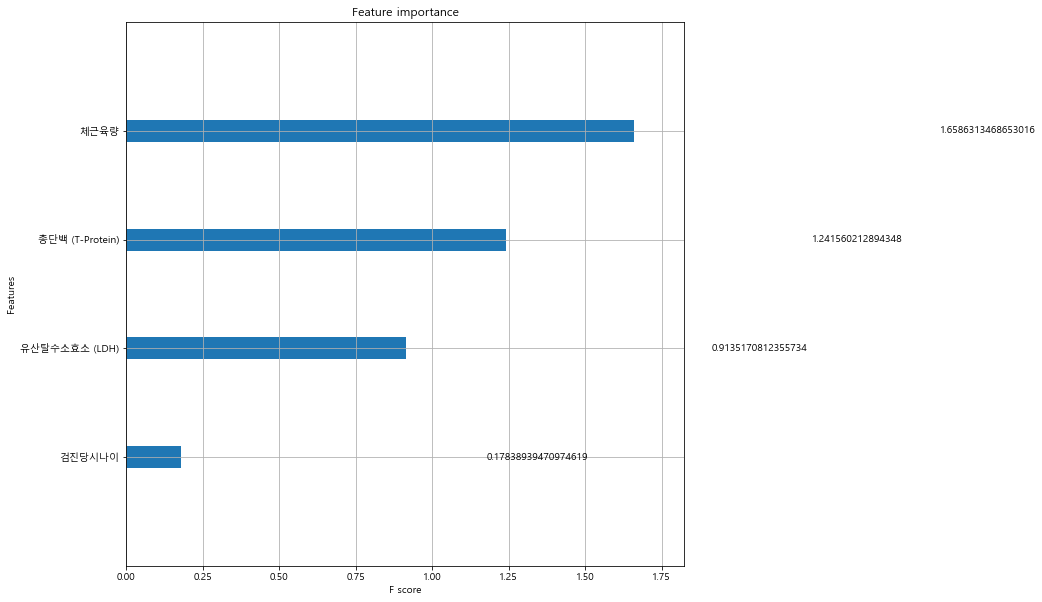

In [452]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [453]:
model2.feature_importances_

array([0.04468563, 0.41547862, 0.31100446, 0.22883134], dtype=float32)

In [454]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [455]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,체근육량,0.415479
2,총단백 (T-Protein),0.311004
3,유산탈수소효소 (LDH),0.228831
0,검진당시나이,0.044686


# 실제나이 - 예측나이 결과

In [456]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [457]:
df_test2.head()

,target,0
0,120.0,120.250839
1,91.0,90.762909
2,88.0,88.028374
3,88.0,88.473389
4,89.0,88.844231


In [458]:
df_test2.columns

Index(['target', 0], dtype='object')

In [459]:
df_test2.columns = ['실제지수', '예측지수']

In [460]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [461]:
df_test2.head()

,실제지수,예측지수,diff
0,120.0,120.250839,0.250839
1,91.0,90.762909,-0.237091
2,88.0,88.028374,0.028374
3,88.0,88.473389,0.473389
4,89.0,88.844231,-0.155769


In [462]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [463]:
len(df_test2)

95255

In [464]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,120.0,120.250839,0.250839,0.0
1,91.0,90.762909,-0.237091,-0.0
2,88.0,88.028374,0.028374,0.0
3,88.0,88.473389,0.473389,0.0
4,89.0,88.844231,-0.155769,-0.0


<AxesSubplot:>

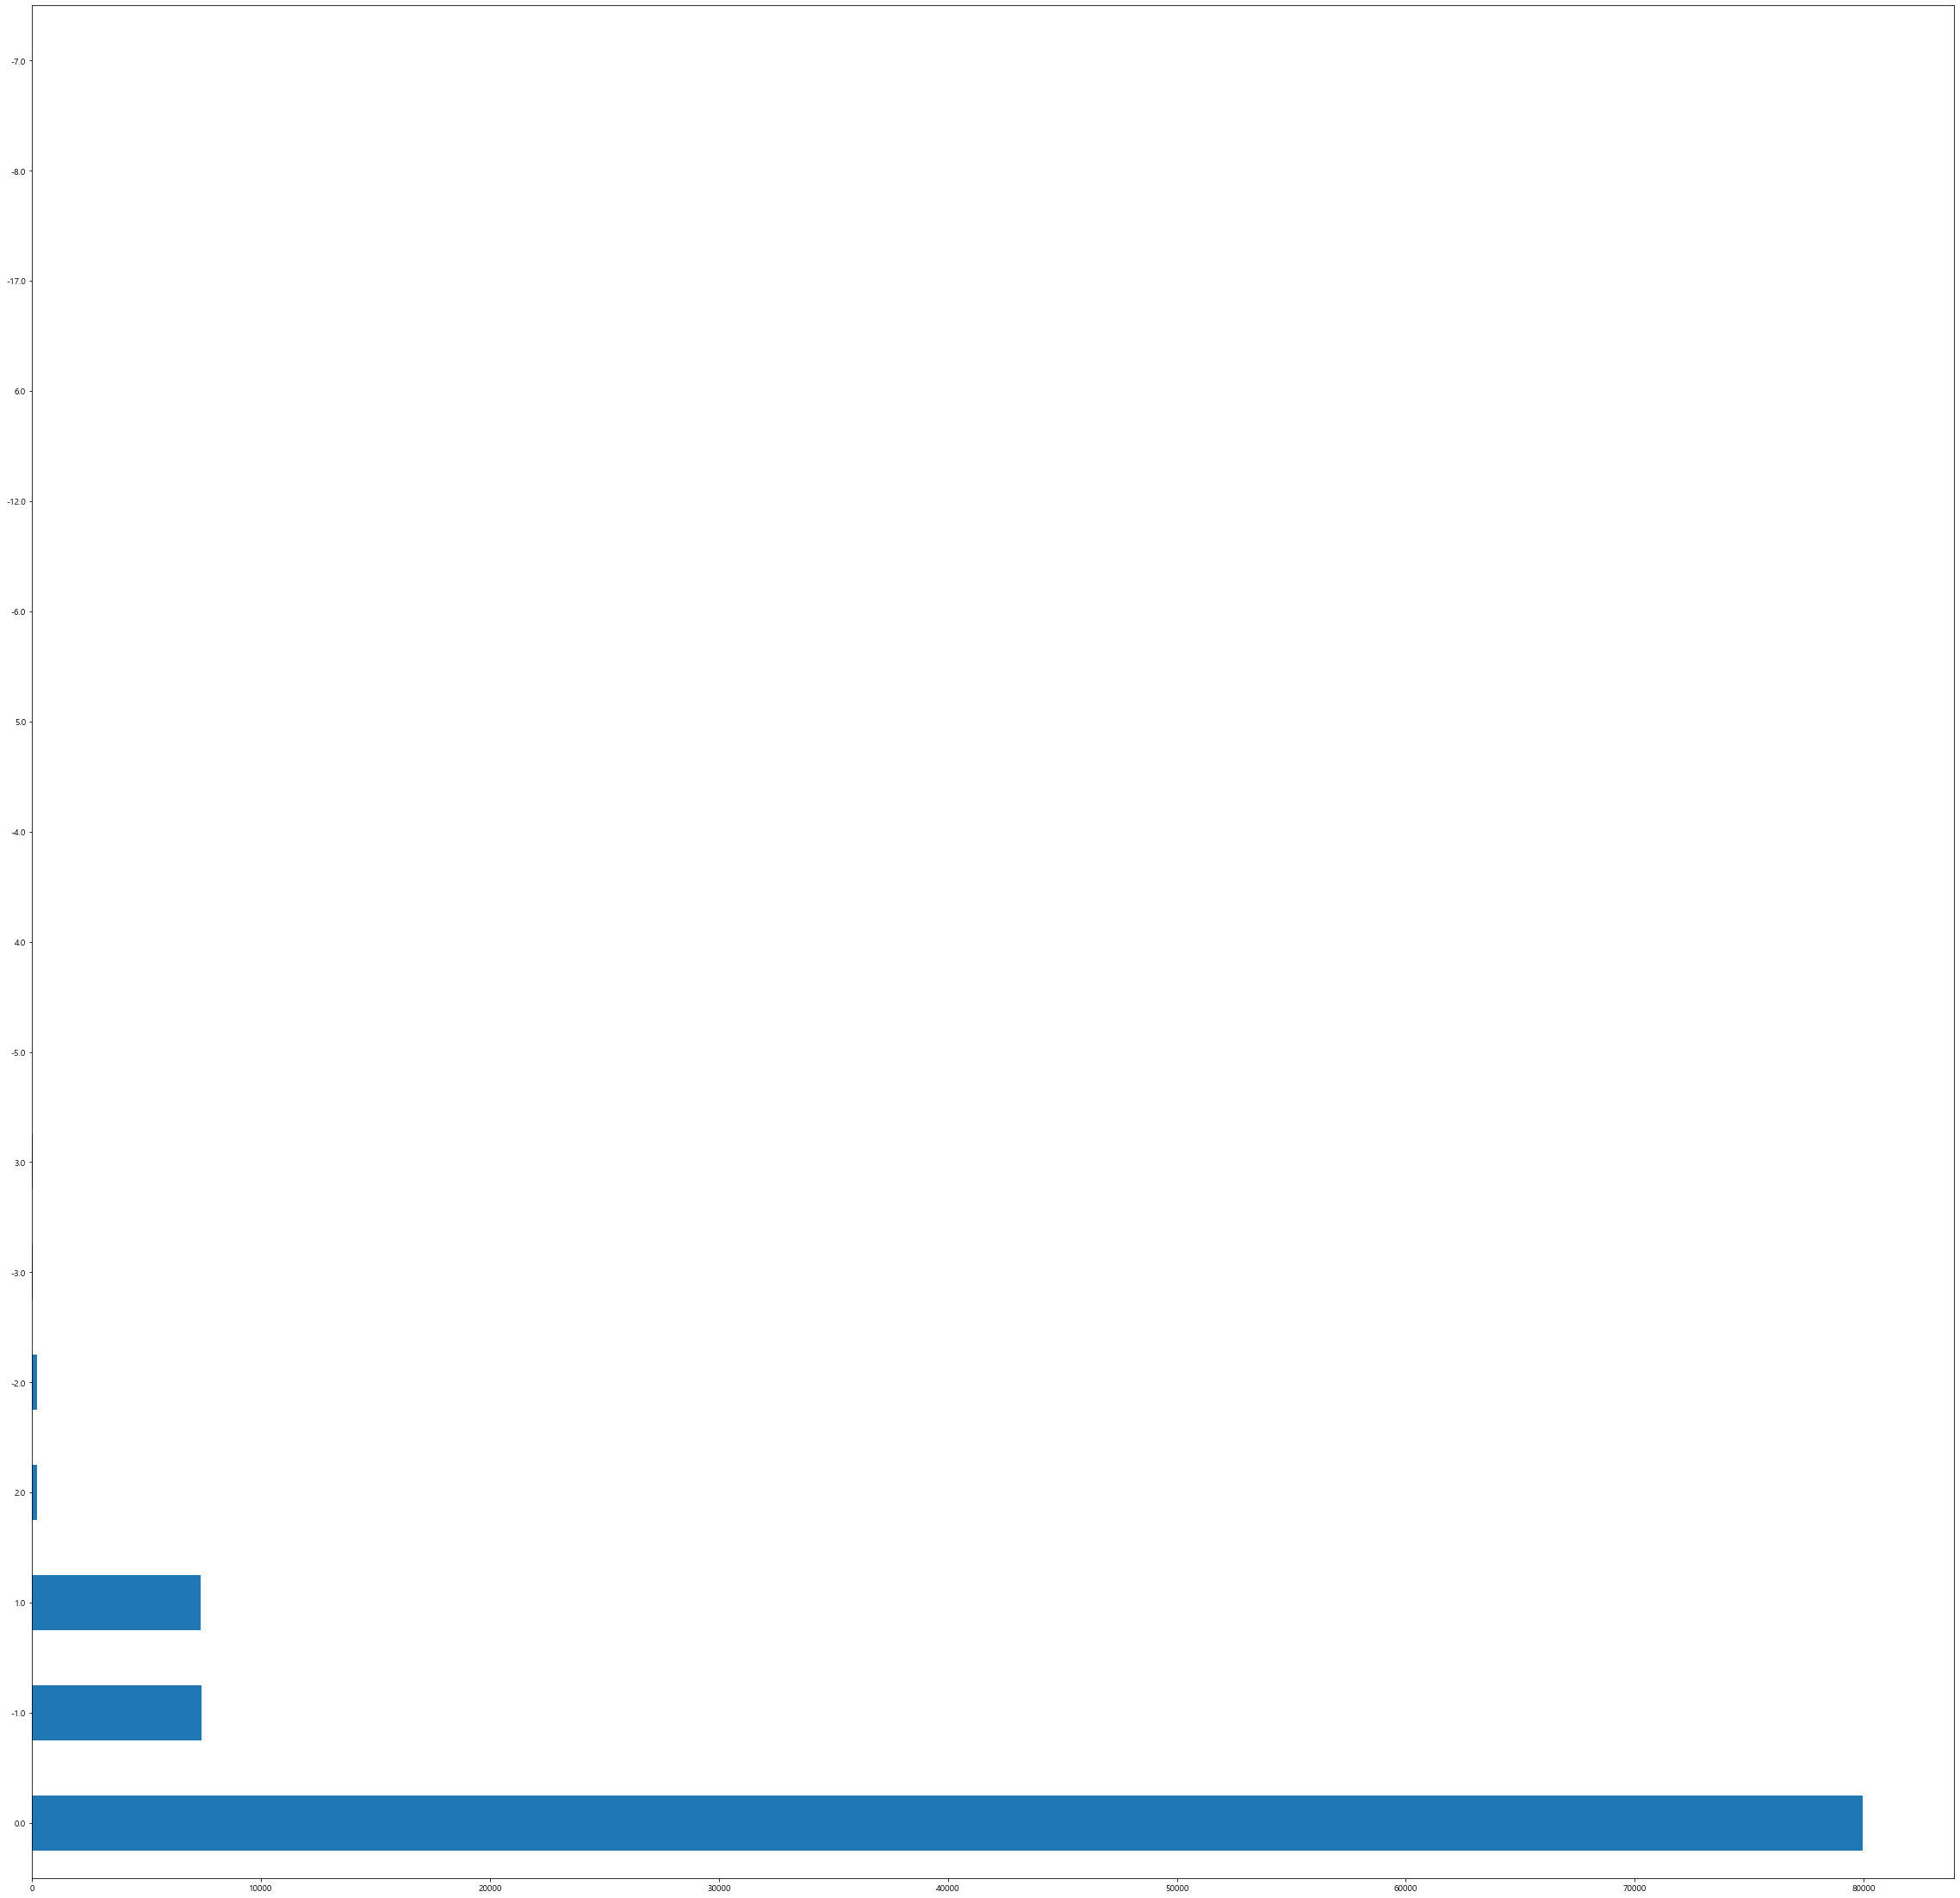

In [465]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [466]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [467]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [468]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [469]:
df_train2.round(0).value_counts()

106.0    16320
94.0     16120
95.0     12694
105.0    12571
104.0    11156
96.0     11044
98.0     10613
102.0    10505
97.0     10446
103.0    10325
99.0      9511
101.0     9431
100.0     8873
93.0      8570
110.0     8453
91.0      8447
111.0     8407
90.0      8385
107.0     8335
89.0      8315
109.0     8303
92.0      8202
108.0     8178
112.0     8152
88.0      8074
87.0      2656
113.0     2382
114.0     2109
86.0      2065
115.0     2015
85.0      1959
84.0      1678
116.0     1604
117.0     1504
83.0      1443
82.0      1382
118.0     1357
119.0     1223
81.0      1145
120.0     1107
80.0      1050
79.0       900
121.0      835
122.0      760
78.0       759
77.0       589
123.0      586
76.0       434
124.0      381
75.0       378
125.0      373
126.0      317
74.0       304
128.0      269
73.0       260
127.0      239
72.0       228
71.0       192
129.0      179
130.0      176
70.0       170
69.0       144
131.0      134
68.0       113
132.0      100
133.0       95
67.0      

In [470]:
y_test2.value_counts()

106.0    5493
94.0     5472
105.0    4282
95.0     4206
96.0     3680
104.0    3650
98.0     3566
103.0    3504
102.0    3503
97.0     3449
99.0     3079
101.0    3051
100.0    3023
110.0    2880
112.0    2824
107.0    2819
91.0     2812
109.0    2805
90.0     2789
93.0     2771
88.0     2747
108.0    2678
89.0     2670
111.0    2662
92.0     2646
87.0      834
113.0     789
114.0     701
86.0      688
115.0     664
85.0      637
116.0     579
84.0      573
83.0      492
117.0     485
82.0      482
118.0     466
80.0      402
119.0     391
81.0      387
120.0     313
121.0     304
122.0     300
78.0      274
79.0      257
123.0     223
77.0      208
124.0     137
76.0      130
125.0     118
74.0      118
126.0     112
75.0       98
70.0       79
73.0       78
71.0       77
72.0       76
128.0      75
127.0      74
130.0      73
129.0      70
131.0      50
132.0      39
69.0       37
67.0       36
68.0       33
133.0      31
134.0      27
66.0       27
64.0       23
135.0      20
62.0  

In [471]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [472]:
df_plot.columns = ['count']

In [473]:
df_plot.reset_index(inplace=True)

In [474]:
df_plot = df_plot.sort_values('index', ascending=True)

In [475]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

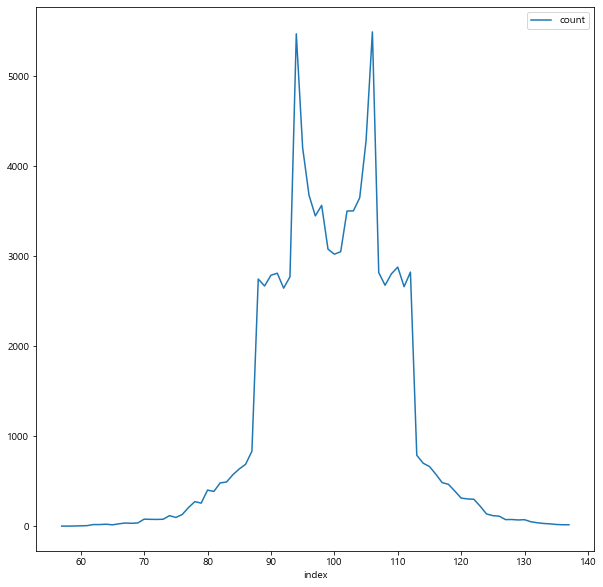

In [476]:
df_plot.plot()

In [477]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [478]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [479]:
df_test2.round(0).value_counts()

106.0    5466
94.0     5401
105.0    4302
95.0     4236
96.0     3714
104.0    3709
98.0     3535
103.0    3507
97.0     3457
102.0    3409
99.0     3186
101.0    3093
100.0    2896
110.0    2850
107.0    2836
90.0     2820
93.0     2816
111.0    2805
91.0     2805
109.0    2771
112.0    2745
108.0    2703
89.0     2701
92.0     2680
88.0     2622
87.0      882
113.0     742
114.0     705
115.0     702
86.0      687
85.0      639
84.0      569
116.0     556
82.0      502
83.0      489
118.0     480
117.0     470
80.0      382
119.0     382
81.0      364
120.0     334
122.0     299
79.0      282
121.0     280
78.0      248
77.0      230
123.0     220
124.0     137
76.0      131
125.0     130
126.0     109
75.0      109
74.0       95
72.0       89
73.0       85
128.0      83
130.0      79
71.0       71
70.0       69
127.0      66
129.0      66
131.0      45
132.0      43
68.0       41
69.0       38
66.0       28
67.0       28
134.0      27
133.0      25
135.0      22
64.0       20
62.0  

In [480]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [481]:
df_plot2.columns = ['count']

In [482]:
df_plot2.reset_index(inplace=True)

In [483]:
df_plot2

,0,count
0,106.0,5466
1,94.0,5401
2,105.0,4302
3,95.0,4236
4,96.0,3714
5,104.0,3709
6,98.0,3535
7,103.0,3507
8,97.0,3457
9,102.0,3409


In [484]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [485]:
df_plot2.set_index(0, inplace=True)

In [486]:
df_plot2

,count
0,
57.0,2
58.0,2
59.0,4
60.0,5
61.0,9
62.0,19
63.0,17
64.0,20
65.0,18


<AxesSubplot:xlabel='0'>

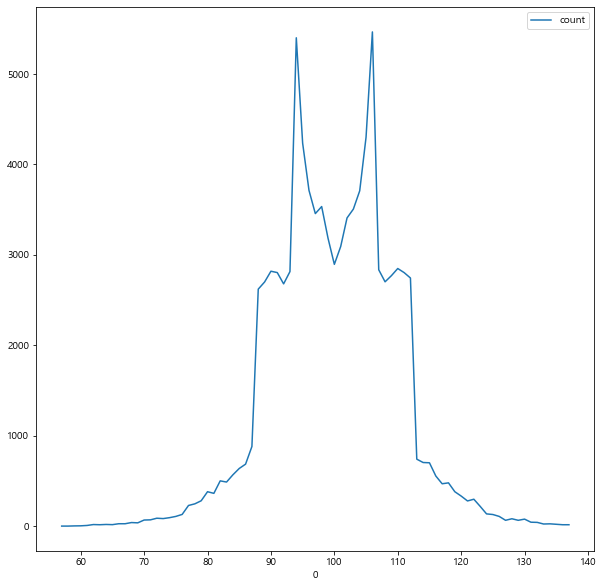

In [487]:
df_plot2.plot()

# 시각화

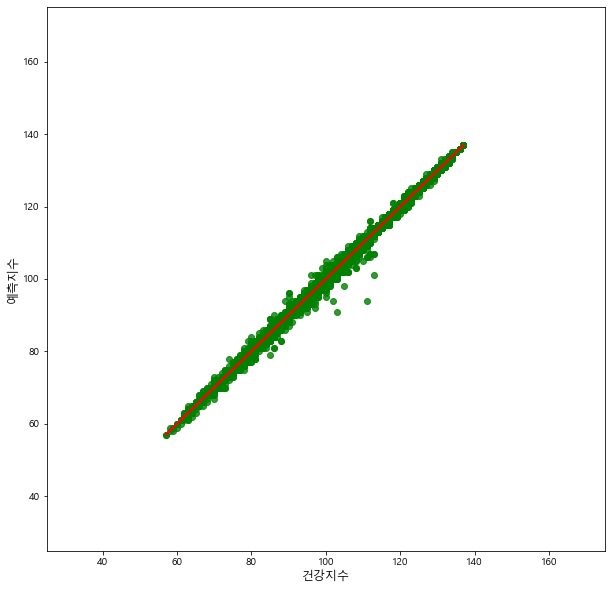

In [488]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [489]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2021.0,53.0,2632765.0,2.0,26.0,34.16,7.2,174.0,100.00,149.48,59.32,102.20,101.0
1,2024.0,53.0,2658222.0,2.0,29.0,34.16,7.1,172.0,100.00,147.84,77.11,106.24,103.0
2,2020.0,54.0,497669.0,2.0,30.0,35.30,7.0,130.0,93.46,144.69,102.44,108.51,104.0
3,2022.0,54.0,1319859.0,2.0,32.0,34.16,6.8,137.0,100.00,103.33,133.42,109.19,105.0
4,2023.0,54.0,2039511.0,2.0,33.0,34.16,6.4,135.0,100.00,37.10,129.02,91.53,96.0


In [490]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305746 entries, 0 to 305745
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   검진년도                 305746 non-null  float64
 1   UID                  305746 non-null  float64
 2   CU_REC_ID            305746 non-null  float64
 3   SEX                  305746 non-null  float64
 4   검진당시나이               305746 non-null  float64
 5   체근육량                 305746 non-null  float64
 6   총단백 (T-Protein)      305746 non-null  float64
 7   유산탈수소효소 (LDH)        305746 non-null  float64
 8   체근육량_kde             305746 non-null  float64
 9   총단백 (T-Protein)_kde  305746 non-null  float64
 10  유산탈수소효소 (LDH)_kde    305746 non-null  float64
 11  kde_mean             305746 non-null  float64
 12  target               305746 non-null  float64
dtypes: float64(13)
memory usage: 30.3 MB


In [491]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
65874,2021.0,196909.0,2495703.0,2.0,28.0,34.16,7.9,150.0,100.0,38.13,147.0,96.28,98.0
65875,2023.0,196909.0,2495700.0,2.0,30.0,34.16,7.8,127.0,100.0,53.33,90.7,86.01,93.0
65876,2024.0,196909.0,2495697.0,2.0,31.0,34.16,7.8,149.0,100.0,48.61,141.7,97.58,99.0


In [492]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [493]:
len(df_pred2)

305746

In [494]:
df_pred2.reset_index(drop=True, inplace=True)

In [495]:
X_test2

,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
212199,40.0,46.70,7.0,191.00
89359,43.0,34.16,6.5,127.00
218101,44.0,34.16,6.7,259.00
113925,25.0,21.50,7.2,158.59
65851,38.0,34.16,7.7,184.00
...,...,...,...,...
112846,37.0,34.16,6.9,239.00
243538,35.0,34.16,6.6,175.00
280770,27.0,34.16,7.4,205.00
205904,50.0,42.30,7.3,158.59


In [496]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체근육량', '총단백 (T-Protein)',
       '유산탈수소효소 (LDH)', '체근육량_kde', '총단백 (T-Protein)_kde', '유산탈수소효소 (LDH)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [497]:
df_pred2[train_columns]

,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
0,26.0,34.16,7.2,174.0
1,29.0,34.16,7.1,172.0
2,30.0,35.30,7.0,130.0
3,32.0,34.16,6.8,137.0
4,33.0,34.16,6.4,135.0
...,...,...,...,...
305741,47.0,34.16,7.5,140.0
305742,50.0,34.16,7.8,176.0
305743,57.0,34.16,7.7,184.0
305744,35.0,34.16,7.7,180.0


In [498]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [499]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [500]:
pred_data2

array([101.195854, 103.02495 , 104.29943 , ...,  98.66512 ,  91.30643 ,
        97.66209 ], dtype=float32)

In [501]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [502]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [503]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수
0,2021.0,53.0,2632765.0,2.0,26.0,34.16,7.2,174.00,100.00,149.48,59.32,102.20,101.0,101.195854
1,2024.0,53.0,2658222.0,2.0,29.0,34.16,7.1,172.00,100.00,147.84,77.11,106.24,103.0,103.024948
2,2020.0,54.0,497669.0,2.0,30.0,35.30,7.0,130.00,93.46,144.69,102.44,108.51,104.0,104.299431
3,2022.0,54.0,1319859.0,2.0,32.0,34.16,6.8,137.00,100.00,103.33,133.42,109.19,105.0,104.762482
4,2023.0,54.0,2039511.0,2.0,33.0,34.16,6.4,135.00,100.00,37.10,129.02,91.53,96.0,95.490768
5,2024.0,54.0,2750990.0,2.0,34.0,36.00,7.1,156.00,100.32,144.28,135.67,120.15,110.0,110.273308
6,2022.0,56.0,1351361.0,2.0,33.0,34.16,6.5,158.59,100.00,52.29,100.00,88.07,94.0,94.010994
7,2023.0,56.0,2032999.0,2.0,34.0,34.16,7.1,158.59,100.00,144.28,100.00,111.07,106.0,105.514236
8,2021.0,59.0,701026.0,2.0,29.0,34.16,7.1,158.59,100.00,147.84,100.00,111.96,106.0,106.047241
9,2022.0,59.0,1376992.0,2.0,30.0,34.16,6.9,158.59,100.00,134.91,100.00,108.73,104.0,104.116074


## 예측지수 성능평가

In [504]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.2999759409391819

# target으로 나이 계산

In [505]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [506]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2021.0,53.0,2632765.0,2.0,26.0,34.16,7.2,174.00,100.00,149.48,59.32,102.20,101.0,101.195854,25.76
1,2024.0,53.0,2658222.0,2.0,29.0,34.16,7.1,172.00,100.00,147.84,77.11,106.24,103.0,103.024948,28.40
2,2020.0,54.0,497669.0,2.0,30.0,35.30,7.0,130.00,93.46,144.69,102.44,108.51,104.0,104.299431,29.14
3,2022.0,54.0,1319859.0,2.0,32.0,34.16,6.8,137.00,100.00,103.33,133.42,109.19,105.0,104.762482,31.05
4,2023.0,54.0,2039511.0,2.0,33.0,34.16,6.4,135.00,100.00,37.10,129.02,91.53,96.0,95.490768,33.90
5,2024.0,54.0,2750990.0,2.0,34.0,36.00,7.1,156.00,100.32,144.28,135.67,120.15,110.0,110.273308,31.95
6,2022.0,56.0,1351361.0,2.0,33.0,34.16,6.5,158.59,100.00,52.29,100.00,88.07,94.0,94.010994,34.20
7,2023.0,56.0,2032999.0,2.0,34.0,34.16,7.1,158.59,100.00,144.28,100.00,111.07,106.0,105.514236,32.90
8,2021.0,59.0,701026.0,2.0,29.0,34.16,7.1,158.59,100.00,147.84,100.00,111.96,106.0,106.047241,27.79
9,2022.0,59.0,1376992.0,2.0,30.0,34.16,6.9,158.59,100.00,134.91,100.00,108.73,104.0,104.116074,29.18


## 예측나이 성능평가

In [507]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.4066052867412817

# 최종 산출

In [508]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),체근육량_kde,총단백 (T-Protein)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2021.0,53.0,2632765.0,2.0,26.0,34.16,7.2,174.0,100.00,149.48,59.32,102.20,101.0,101.195854,25.76
1,2024.0,53.0,2658222.0,2.0,29.0,34.16,7.1,172.0,100.00,147.84,77.11,106.24,103.0,103.024948,28.40
2,2020.0,54.0,497669.0,2.0,30.0,35.30,7.0,130.0,93.46,144.69,102.44,108.51,104.0,104.299431,29.14
3,2022.0,54.0,1319859.0,2.0,32.0,34.16,6.8,137.0,100.00,103.33,133.42,109.19,105.0,104.762482,31.05
4,2023.0,54.0,2039511.0,2.0,33.0,34.16,6.4,135.0,100.00,37.10,129.02,91.53,96.0,95.490768,33.90


# DataMart csv

In [509]:
df_copy = df.copy()

In [510]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,NaN,7.6,165.0
1,2010,7490,3638,1,39,NaN,6.9,298.0
2,2010,7915,3997,1,36,NaN,7.3,241.0
3,2010,8056,4745,1,42,NaN,7.2,315.0
4,2010,8457,3929,1,38,NaN,7.6,350.0


In [511]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   체근육량             248954 non-null   float64
 6   총단백 (T-Protein)  1111245 non-null  float64
 7   유산탈수소효소 (LDH)    907336 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [512]:
minimums

[7.550000000000008, 6.000000000000001, 78.0]

In [513]:
maximums

[82.35, 8.399999999999999, 262.0]

In [514]:
train_columns

['검진당시나이', '체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [515]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [516]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [517]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [518]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)
10,2010,15894,2533,2,29,NaN,7.1,NaN
22,2010,42223,1364,2,24,NaN,7.6,NaN
37,2011,364096,6645,2,32,34.0,7.5,NaN
45,2010,120518,3595,2,30,NaN,7.3,262.0
63,2011,698706,6600,2,36,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [519]:
target_cols

['체근육량', '총단백 (T-Protein)', '유산탈수소효소 (LDH)']

In [520]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [521]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [522]:
len(df_woman_csv)

409133

## fillna

In [523]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체근육량', '총단백 (T-Protein)',
       '유산탈수소효소 (LDH)', '체근육량_kde', '총단백 (T-Protein)_kde', '유산탈수소효소 (LDH)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [524]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체근육량', '총단백 (T-Protein)',
       '유산탈수소효소 (LDH)'],
      dtype='object')

In [525]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 총단백 (T-Protein) 스크리닝

In [526]:
screening = 8.5

In [527]:
scr_col = '총단백 (T-Protein)'

In [528]:
df_woman_csv[df_woman_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)


In [529]:
len(df_woman_csv[df_woman_csv[scr_col] > screening])

0

In [530]:
df_woman_csv.loc[df_woman_csv[scr_col] > screening, scr_col] = screening

In [531]:
df_woman_csv[df_woman_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH)


In [532]:
len(df_woman_csv[df_woman_csv[scr_col] > screening])

0

In [533]:
len(df_woman_csv)

409133

## 모델 예측

In [534]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [535]:
pred_data2 = pred_data2.round(0)

In [536]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [537]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수
0,2010,15894,2533,2,29,34.11,7.1,158.82,106.0
1,2010,42223,1364,2,24,34.11,7.6,158.82,98.0
2,2011,364096,6645,2,32,34.00,7.5,158.82,98.0
3,2010,120518,3595,2,30,34.11,7.3,262.00,87.0
4,2010,167053,3087,2,26,34.11,6.4,158.82,91.0


### 성능 평가

In [538]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [539]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [540]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [541]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 1.659798158545021


In [542]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9345210993802693

In [543]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
0,2010,15894,2533,2,29,34.11,7.1,158.82,106.0,27.8
1,2010,42223,1364,2,24,34.11,7.6,158.82,98.0,24.4
2,2011,364096,6645,2,32,34.00,7.5,158.82,98.0,32.4
3,2010,120518,3595,2,30,34.11,7.3,262.00,87.0,32.6
4,2010,167053,3087,2,26,34.11,6.4,158.82,91.0,27.8


In [544]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409133 entries, 0 to 409132
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             409133 non-null  int64  
 1   UID              409133 non-null  int64  
 2   CU_REC_ID        409133 non-null  int64  
 3   SEX              409133 non-null  int64  
 4   검진당시나이           409133 non-null  int64  
 5   체근육량             409133 non-null  float64
 6   총단백 (T-Protein)  409133 non-null  float64
 7   유산탈수소효소 (LDH)    409133 non-null  float64
 8   예측지수             409133 non-null  float32
 9   예측나이             409133 non-null  float64
dtypes: float32(1), float64(4), int64(5)
memory usage: 29.7 MB


# 최종 UID별 확인

In [545]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
108409,2021,261581,806568,2,50,34.11,7.9,177.0,89.0,52.2
108417,2021,261581,2243879,2,50,34.11,7.9,177.0,89.0,52.2
108418,2021,261581,2418909,2,50,34.11,7.9,177.0,89.0,52.2
108419,2021,261581,2418910,2,50,34.11,7.9,177.0,89.0,52.2
169017,2022,261581,751339,2,51,34.11,7.2,179.0,101.0,50.8
169020,2022,261581,2243878,2,51,34.11,7.2,179.0,101.0,50.8
258612,2023,261581,1519764,2,52,34.11,7.5,177.0,101.0,51.8
258613,2023,261581,2243877,2,52,34.11,7.5,177.0,101.0,51.8
375147,2024,261581,2418911,2,53,34.11,6.7,162.0,97.0,53.6


In [546]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
54081,2022,477944,956268,2,31,34.11,6.5,120.0,83.0,34.4
200041,2022,477944,2212776,2,31,34.11,6.5,120.0,83.0,34.4
302019,2023,477944,1454346,2,32,34.11,7.0,121.0,99.0,32.2
302020,2023,477944,2212775,2,32,34.11,7.0,121.0,99.0,32.2
387445,2024,477944,2362855,2,33,34.11,7.9,123.0,85.0,36.0


In [547]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
327191,2023,896916,1459636,2,28,34.11,7.1,161.0,104.0,27.2
327180,2023,896916,1842092,2,28,34.11,7.1,161.0,104.0,27.2
327192,2023,896916,2031853,2,28,34.11,7.1,161.0,104.0,27.2
327193,2023,896916,2253054,2,28,34.11,7.1,161.0,104.0,27.2
321487,2023,896916,2257188,2,28,34.11,7.1,161.0,104.0,27.2
398229,2024,896916,2253058,2,29,34.11,6.5,150.0,97.0,29.6


# 최종 CSV 병합 Extract

In [548]:
len(df_man_csv)

705098

In [549]:
len(df_woman_csv)

409133

In [550]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [551]:
df_csv.to_csv(csv_path)